# Effect of the planarity decriptor (MPP), Scaffold descriptors and other structural descriptors on Ered predictions

## Notebook will show that these descriptors doesn't significantly improve the Ered prediction accuracy  of the GPR model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import rdkit.Chem as Chem
pd.set_option('display.max_columns', None)

In [2]:
ERed_data=pd.read_csv(r"./Data/BTZ_smi_Ered_MPP_2763.csv",usecols=["SMILES","Ered_ag","MPP(A)"])
ERed_data.head()

,SMILES,MPP(A),Ered_ag
0,Cc1c2c(cc3nsnc13)N(C)CCN2CCN(C)C,0.908587,-2.58
1,CCN1CCN(CCOC)c2c1cc1nsnc1c2C,0.799408,-2.58
2,CCNc1c2c(cc3nsnc13)N(C)CCN2C(C)C,1.279319,-2.61
3,CCCN1CCN(CC)c2cc3nsnc3c(NCC)c21,1.039480,-2.63
4,CCNc1c2c(cc3nsnc13)N(CC)CCN2C(C)C,1.296932,-2.65


# Checking for duplicate smiles

In [3]:
def remove_duplicate_smi(df,smi_col="SMILES"):
    """ df: dataframe with the 'SMILES' column """
    temp=df.shape[0]
    print(f"Before: df.shape={df.shape}")
    df[smi_col]=df[smi_col].apply(lambda smi:Chem.MolToSmiles(Chem.MolFromSmiles(smi)))
    df=df.drop_duplicates(subset=smi_col)
    print(f"After: df.shape={df.shape}")
    print(f"Removed {df.shape[0]-temp} duplicate smiles")
    return df


In [4]:
ERed_data=remove_duplicate_smi(df=ERed_data,smi_col="SMILES")

Before: df.shape=(2763, 3)
After: df.shape=(2763, 3)
Removed 0 duplicate smiles


# No duplicate SMILES found

In [5]:
ERed_data.index=np.arange(len(ERed_data))
ERed_data.head()

,SMILES,MPP(A),Ered_ag
0,Cc1c2c(cc3nsnc13)N(C)CCN2CCN(C)C,0.908587,-2.58
1,CCN1CCN(CCOC)c2c1cc1nsnc1c2C,0.799408,-2.58
2,CCNc1c2c(cc3nsnc13)N(C)CCN2C(C)C,1.279319,-2.61
3,CCCN1CCN(CC)c2cc3nsnc3c(NCC)c21,1.039480,-2.63
4,CCNc1c2c(cc3nsnc13)N(CC)CCN2C(C)C,1.296932,-2.65


# Feature Generation with the RDKIT

In [6]:
def RDkit_descriptors(smiles):
    """
    Function will return all 208 RDKit descriptors
    smiles is a pandas series or a list of smiles
    """
    from rdkit.ML.Descriptors import MoleculeDescriptors
    from rdkit.Chem import Descriptors
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 208 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

In [7]:
# call function
Mol_descriptors,desc_names = RDkit_descriptors(smiles=ERed_data.SMILES)
df_rdkit = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_rdkit.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.673164,-4.313692,8.673164,0.278641,0.861773,291.424,270.256,291.151767,108,0,0.109421,-0.371076,0.371076,0.109421,1.550000,2.500000,3.300000,1.460045e-15,-0.246537,-2.572833e-17,-2.722027,-1.166959e-16,-2.828997,4.401419e-16,-1.048429,2.676061,1319.710561,32.317473,30.644316,10.460813,17.869915,15.574823,5.805120,3.612095,4.140543,2.417668,2.946116,1.611669,2.125660,-1.40,1.083990e+08,3.329290,5.179478,2.226066,153.172494,14.699729,11.033401,0.000000,0.0,0.0,0.0,0.0,0.0,8.74708,0.0,0.000000,26.845965,57.717337,32.698270,28.785930,34.136361,0.0,13.64699,0.0,6.851892,56.714739,11.605870,0.0,0.0,9.799819,11.374773,0.0,11.728187,60.561909,0.000000,6.851892,34.349381,6.042419,0.000000,11.033401,0.0,35.50,97.580675,0.0,0.0,4.899910,11.728187,0.0,0.0,0.0,0.0,8.747080,28.785930,177.855130,0.330538,-1.645123,0.000000,-5.035603,0.0,-1.044342,0.00000,-31.627267,0.000000,0.571429,20,0,5,0,1,1,1,1,2,6,0,6,7,0,0,0,3,1.81752,86.1890,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8.626172,-4.129610,8.626172,0.326009,0.864637,292.408,272.248,292.135782,108,0,0.109421,-0.382853,0.382853,0.109421,1.550000,2.500000,3.350000,4.819916e-15,-0.248509,-2.855418e-17,-2.715352,-3.770785e-17,-2.810480,5.445269e-16,-1.039085,2.689828,1309.444040,31.447229,29.605351,10.421848,17.460996,15.062251,5.792548,3.480809,4.009257,2.464343,2.992790,1.663987,2.177978,-1.40,7.818057e+07,3.495314,5.535354,2.125124,151.1

# Add [Molecular planarity parameter (MPP)](https://link.springer.com/article/10.1007/s00894-021-04884-0) of all atoms to the feature set
## MPP of all atoms and only heavy atoms are highly correlated. Hence, I only use the MPP of all atoms

In [8]:
df_rdkit.insert(0,"MPP(A)",ERed_data["MPP(A)"].to_list())
ERed_data=ERed_data.drop(columns=["MPP(A)"])

In [9]:
df_rdkit.head()

,MPP(A),MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.908587,8.673164,-4.313692,8.673164,0.278641,0.861773,291.424,270.256,291.151767,108,0,0.109421,-0.371076,0.371076,0.109421,1.550000,2.500000,3.300000,1.460045e-15,-0.246537,-2.572833e-17,-2.722027,-1.166959e-16,-2.828997,4.401419e-16,-1.048429,2.676061,1319.710561,32.317473,30.644316,10.460813,17.869915,15.574823,5.805120,3.612095,4.140543,2.417668,2.946116,1.611669,2.125660,-1.40,1.083990e+08,3.329290,5.179478,2.226066,153.172494,14.699729,11.033401,0.000000,0.0,0.0,0.0,0.0,0.0,8.74708,0.0,0.000000,26.845965,57.717337,32.698270,28.785930,34.136361,0.0,13.64699,0.0,6.851892,56.714739,11.605870,0.0,0.0,9.799819,11.374773,0.0,11.728187,60.561909,0.000000,6.851892,34.349381,6.042419,0.000000,11.033401,0.0,35.50,97.580675,0.0,0.0,4.899910,11.728187,0.0,0.0,0.0,0.0,8.747080,28.785930,177.855130,0.330538,-1.645123,0.000000,-5.035603,0.0,-1.044342,0.00000,-31.627267,0.000000,0.571429,20,0,5,0,1,1,1,1,2,6,0,6,7,0,0,0,3,1.81752,86.1890,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.799408,8.626172,-4.129610,8.626172,0.326009,0.864637,292.408,272.248,292.135782,108,0,0.109421,-0.382853,0.382853,0.109421,1.550000,2.500000,3.350000,4.819916e-15,-0.248509,-2.855418e-17,-2.715352,-3.770785e-17,-2.810480,5.445269e-16,-1.039085,2.689828,1309.444040,31.447229,29.605351,10.421848,17.460996,15.062251,5.792548,3.480809,4.009257,2.464343,2.992790,1.663987,2.177978,-1.40,7.818057e+07,3.49531

# Label molecules by the substructure

In [10]:
def substruct_in_smi(mol_smi_str,pat_smi_str):
    """
    This function will return True if the substructure (pattern) is present in the SMILES string.
    Input: smi_str = A SMILES string;   sub_str = Pattern 
    Output: True (substruture found in the smi); False (substruture not found in the smi)
    """   
    mol = Chem.MolFromSmiles(mol_smi_str)
    pat = Chem.MolFromSmiles(pat_smi_str) 

    return mol.HasSubstructMatch(pat)

In [11]:
import datamol as dm

# Make a folder to save output files

In [12]:
import os
# Directory
directory = "planarity_hypo_test_2763btzs_withoutrings_scaff"
  
# Parent Directory path
parent_dir = "./"
  
# Path
path = os.path.join(parent_dir, directory)
if not os.path.isdir(path):  
    os.mkdir(path)
    print("Directory '% s' created" % directory)

Directory 'planarity_hypo_test_2763btzs_withoutrings_scaff' created


In [13]:
folder_path=directory+"/"

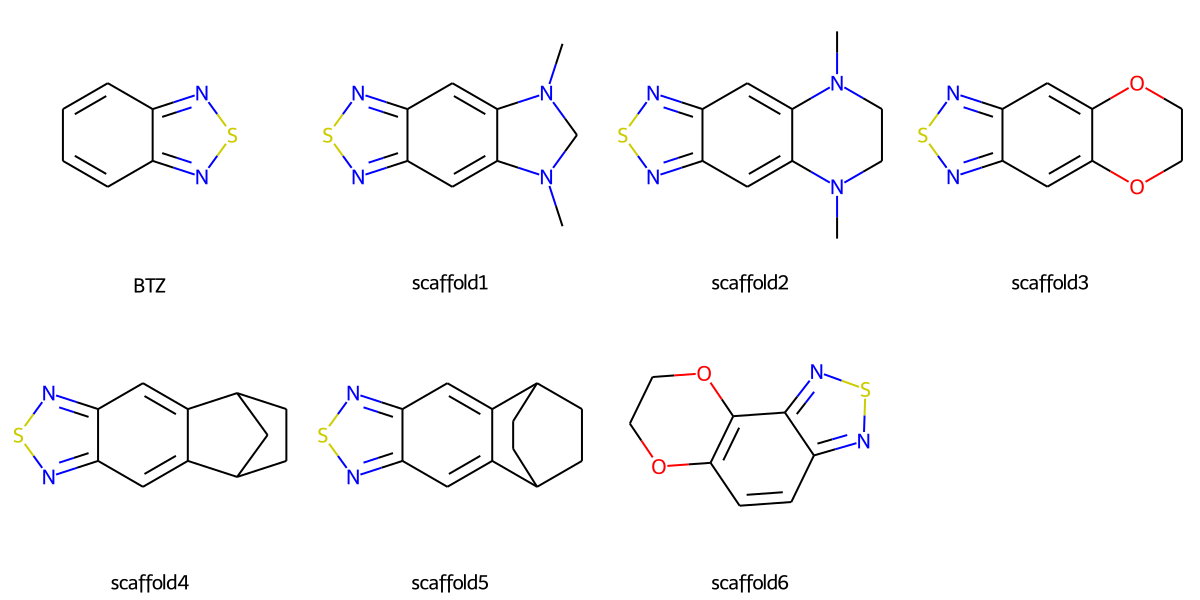

In [14]:
scaff=['c1ccc2nsnc2c1',
 'CN1CN(C)c2cc3nsnc3cc21',
 'CN1CCN(C)c2cc3nsnc3cc21',
 'c1c2c(cc3nsnc13)OCCO2',
 'c1c2c(cc3nsnc13)C1CCC2C1',
 'c1c2c(cc3nsnc13)C1CCC2CC1',
 'C1COc2c(cc(c4nsnc24))O1']

mols=[Chem.MolFromSmiles(smi) for smi in scaff]
col_txt=['BTZ','scaffold1', 'scaffold2', 'scaffold3', 'scaffold4', 'scaffold5', 'scaffold6']
dm.to_image(mols=mols,legends=col_txt,legend_fontsize=20,outfile=folder_path+"Scaffolds.png",use_svg=False)

In [15]:
df_rdkit.head()

,MPP(A),MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.908587,8.673164,-4.313692,8.673164,0.278641,0.861773,291.424,270.256,291.151767,108,0,0.109421,-0.371076,0.371076,0.109421,1.550000,2.500000,3.300000,1.460045e-15,-0.246537,-2.572833e-17,-2.722027,-1.166959e-16,-2.828997,4.401419e-16,-1.048429,2.676061,1319.710561,32.317473,30.644316,10.460813,17.869915,15.574823,5.805120,3.612095,4.140543,2.417668,2.946116,1.611669,2.125660,-1.40,1.083990e+08,3.329290,5.179478,2.226066,153.172494,14.699729,11.033401,0.000000,0.0,0.0,0.0,0.0,0.0,8.74708,0.0,0.000000,26.845965,57.717337,32.698270,28.785930,34.136361,0.0,13.64699,0.0,6.851892,56.714739,11.605870,0.0,0.0,9.799819,11.374773,0.0,11.728187,60.561909,0.000000,6.851892,34.349381,6.042419,0.000000,11.033401,0.0,35.50,97.580675,0.0,0.0,4.899910,11.728187,0.0,0.0,0.0,0.0,8.747080,28.785930,177.855130,0.330538,-1.645123,0.000000,-5.035603,0.0,-1.044342,0.00000,-31.627267,0.000000,0.571429,20,0,5,0,1,1,1,1,2,6,0,6,7,0,0,0,3,1.81752,86.1890,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,0,0,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.799408,8.626172,-4.129610,8.626172,0.326009,0.864637,292.408,272.248,292.135782,108,0,0.109421,-0.382853,0.382853,0.109421,1.550000,2.500000,3.350000,4.819916e-15,-0.248509,-2.855418e-17,-2.715352,-3.770785e-17,-2.810480,5.445269e-16,-1.039085,2.689828,1309.444040,31.447229,29.605351,10.421848,17.460996,15.062251,5.792548,3.480809,4.009257,2.464343,2.992790,1.663987,2.177978,-1.40,7.818057e+07,3.49531

In [16]:
print(f"shape of the features set = {df_rdkit.shape}")

shape of the features set = (2763, 209)


# Data cleaning

In [17]:
def data_cleaning(df):
    # check columns with nan
    columns_with_nan=df.columns[df.isna().any()]
    print(f"Removing {len(columns_with_nan)} columns with nan, if any")
    print(f"Before: df.shape={df.shape}")
    df = df.dropna(axis='columns')
    # df = df.drop(columns=columns_with_nan)
    print(f"After: df.shape={df.shape} \n")    
    

    # Remove duplicates
    print(f"removing {sum(df.columns.duplicated())} duplicate columns, if any")
    print(f"Before: df.shape={df.shape}")
    df=df.loc[:,~df.columns.duplicated()].copy()
    print(f"After: df.shape={df.shape} \n")
    
    
    # Remove columns with a unique value
    print(f"removing {sum(df.nunique()<2)} columns values with a unique value")
    print(f"Before: df.shape={df.shape}")
    df=df.loc[:,df.nunique()>1]
    print(f"After: df.shape={df.shape} \n")
    
    print("returning a clean df")
    return df


In [18]:
def remove_corr_features(Xdata,corr_cutoff = 0.75):
    """
    This function will drop highly correlated features
    Output: a pd.Dataframe 
    """
    cor_matrix=Xdata.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))

    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_cutoff)]
    print(f"Dropped %d features with correlation coeff. > %0.2f" %(len(to_drop),corr_cutoff))

    Xdata=Xdata.drop(columns=to_drop,axis=1)
    print(f"Remaining features %d" %(Xdata.shape[1]))
    return Xdata

In [19]:
df_rdkit=data_cleaning(df=df_rdkit)

Removing 0 columns with nan, if any
Before: df.shape=(2763, 209)
After: df.shape=(2763, 209) 

removing 0 duplicate columns, if any
Before: df.shape=(2763, 209)
After: df.shape=(2763, 209) 

removing 90 columns values with a unique value
Before: df.shape=(2763, 209)
After: df.shape=(2763, 119) 

returning a clean df


# Remove highly correlated features

In [20]:
df_rdkit_uncorr=remove_corr_features(Xdata=df_rdkit, corr_cutoff=0.8)
print(df_rdkit_uncorr.shape)

Dropped 68 features with correlation coeff. > 0.80
Remaining features 51
(2763, 51)


In [21]:
df_rdkit_uncorr.head()

,MPP(A),MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPLOW,BCUT2D_MRLOW,BalabanJ,HallKierAlpha,Ipc,Kappa1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA10,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA9,SlogP_VSA3,SlogP_VSA4,SlogP_VSA6,SlogP_VSA7,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA8,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState9,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,MolLogP,fr_Ndealkylation1,fr_aryl_methyl,fr_bicyclic
0,0.908587,8.673164,-4.313692,0.278641,0.861773,-0.371076,1.550000,1.460045e-15,-0.246537,-2.572833e-17,-2.722027,-2.828997,-1.048429,2.676061,-1.40,1.083990e+08,3.329290,11.033401,0.000000,0.0,0.0,0.0,0.000000,26.845965,57.717337,32.698270,34.136361,13.64699,0.0,6.851892,56.714739,0.0,0.000000,6.851892,6.042419,0.000000,4.899910,11.728187,0.0,8.747080,0.0,-1.044342,0.00000,0.000000,0,1,1,1.81752,2,1,2
1,0.799408,8.626172,-4.129610,0.326009,0.864637,-0.382853,1.550000,4.819916e-15,-0.248509,-2.855418e-17,-2.715352,-2.810480,-1.039085,2.689828,-1.40,7.818057e+07,3.495314,11.033401,0.000000,0.0,0.0,0.0,0.000000,19.746203,49.554911,46.111048,34.136361,8.74708,0.0,13.703784,49.384196,0.0,4.736863,6.851892,6.042419,0.000000,4.899910,11.728187,0.0,13.483943,0.0,-1.085786,0.00000,-3.650562,0,1,1,2.29242,1,1,2
2,1.279319,8.716621,-4.210035,0.276514,0.941806,-0.381730,1.700000,1.471424e-15,-0.249134,-1.016592e-17,-2.726273,-2.801322,-1.072492,2.806412,-1.56,1.308464e+08,3.265986,11.033401,1.411842,0.0,0.0,0.0,0.000000,26.598095,51.674918,37.014898,39.823748,8.74708,0.0,26.573569,41.576039,0.0,0.000000,0.000000,6.042419,1.411842,16.628097,0.000000,0.0,8.747080,0.0,-5.298666,0.00000,0.000000,0,1,1,2.78770,1,0,2
3,1.039480,8.729323,-4.283244,0.227811,0.918901,-0.381730,1.476190,9.839806e-16,-0.249219,-4.521798e-17,-2.724223,-2.799474,-1.091391,2.796292,-1.56,4.576093e+08,3.347110,11.033401,1.411842,0.0,0.0,0.0,6.851892,26.119128,55.787194,35.644139,39.823748,8.74708,0.0,26.928601,47.593931,0.0,0.000000,0.000000,6.042419,1.411842,11.728187,0.000000,0.0,8.747080,0.0,-1.196213,-4.17008,0.000000,0,1,1,3.17940,1,0,2
4,1.296932,8.775215,-4.309285,0.217824,0.939652,-0.381730,1.619048,1.606474e-15,-0.249140,-5.862104e-17,-2.736676,-2.810298,-1.072842,2.856537,-1.56,4.444735e+08,3.347110,11.033401,1.411842,0.0,0.0,0.0,0.000000,33.449987,53.937468,37.014898,39.823748,8.74708,0.0,33.425461,41.097072,0.0,0.000000,0.000000,6.042419,1.411842,11.728187,0.000000,0.0,8.747080,0.0,-5.525694,0.00000,0.000000,0,1,1,3.17780,1,0,2


# Remaining features

In [22]:
df_rdkit_uncorr.columns

Index(['MPP(A)', 'MaxEStateIndex', 'MinEStateIndex', 'MinAbsEStateIndex',
       'qed', 'MinPartialCharge', 'FpDensityMorgan1', 'BCUT2D_MWHI',
       'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPLOW',
       'BCUT2D_MRLOW', 'BalabanJ', 'HallKierAlpha', 'Ipc', 'Kappa1',
       'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14',
       'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA10',
       'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA9',
       'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA6', 'SlogP_VSA7', 'EState_VSA2',
       'EState_VSA3', 'EState_VSA4', 'EState_VSA8', 'VSA_EState5',
       'VSA_EState6', 'VSA_EState7', 'VSA_EState9', 'NumAliphaticCarbocycles',
       'NumAliphaticHeterocycles', 'NumAliphaticRings', 'MolLogP',
       'fr_Ndealkylation1', 'fr_aryl_methyl', 'fr_bicyclic'],
      dtype='object')

# Are ERed and above feautures even correlated? 

In [23]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

# Pearson's correlation coefficient (r) between Ered and remaining features are shown in following figures

# 18 out of the 63 features

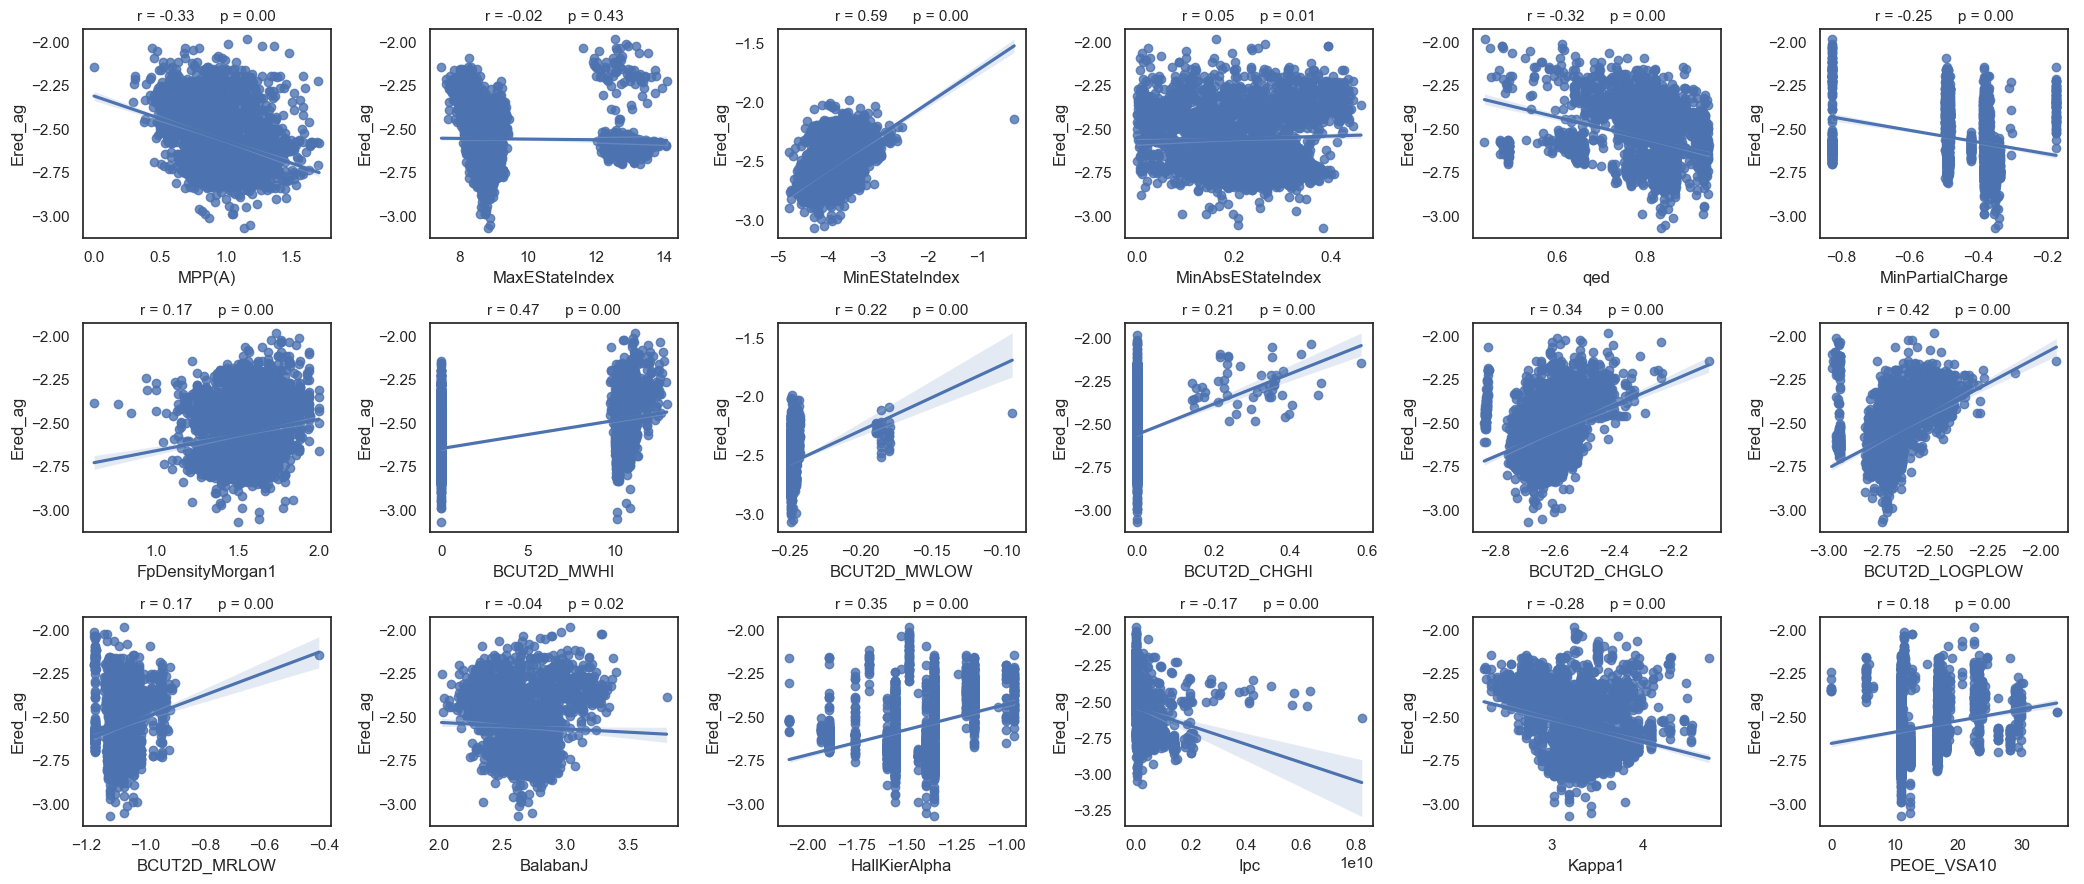

In [24]:
target = 'Ered_ag'
descriptors=df_rdkit_uncorr.columns
corr_ered_feat=[]
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(descriptors):
            
            sns.regplot(x=df_rdkit_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            # print(f"r={r},c={c},axs[r={r}][c={c}]={axs[r][c]}")
            stp = stats.pearsonr(df_rdkit_uncorr[descriptors[i]], ERed_data[target])
            corr_ered_feat.append([i,stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            if type(stp[0]) is not int:
                corr_ered_feat.append([descriptors[i],stp[0]])
            
            axs[r][c].set_title(str_title,fontsize=11)
        else:
            fig.delaxes(axs[r][c])

plt.tight_layout()    
plt.savefig(folder_path+"Ered_features_1to18_pearsons.png",dpi=300)
plt.show()  

# 19-36 out of the 63 features

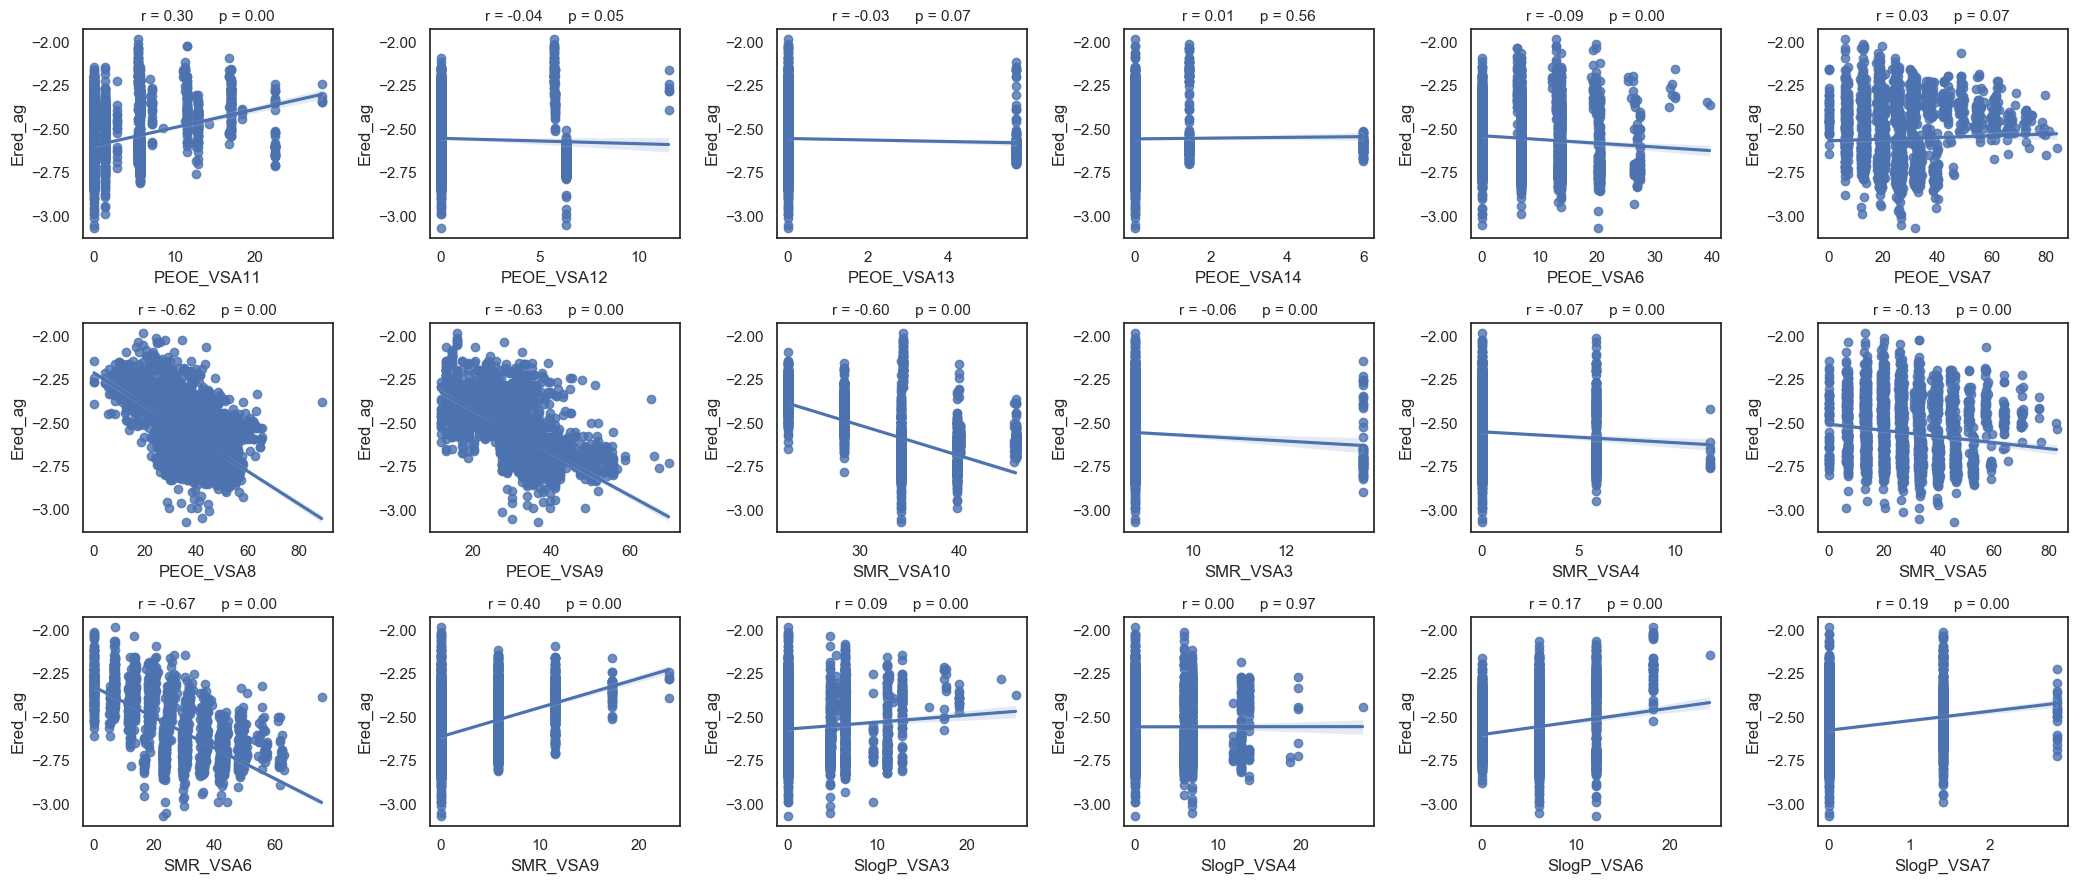

In [25]:
target = 'Ered_ag'
descriptors=df_rdkit_uncorr.columns
# corr_ered_feat=[]
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18
        
        if i < len(descriptors):
            
            sns.regplot(x=df_rdkit_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            # print(f"r={r},c={c},axs[r={r}][c={c}]={axs[r][c]}")
            stp = stats.pearsonr(df_rdkit_uncorr[descriptors[i]], ERed_data[target])
            corr_ered_feat.append([i,stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            if type(stp[0]) is not int:
                corr_ered_feat.append([descriptors[i],stp[0]])
            
            axs[r][c].set_title(str_title,fontsize=11)
        else:
            fig.delaxes(axs[r][c])

plt.tight_layout()    
plt.savefig(folder_path+"Ered_features_19to36_pearsons.png",dpi=300)
plt.show()  

# 37 to 54 out of the 63 features

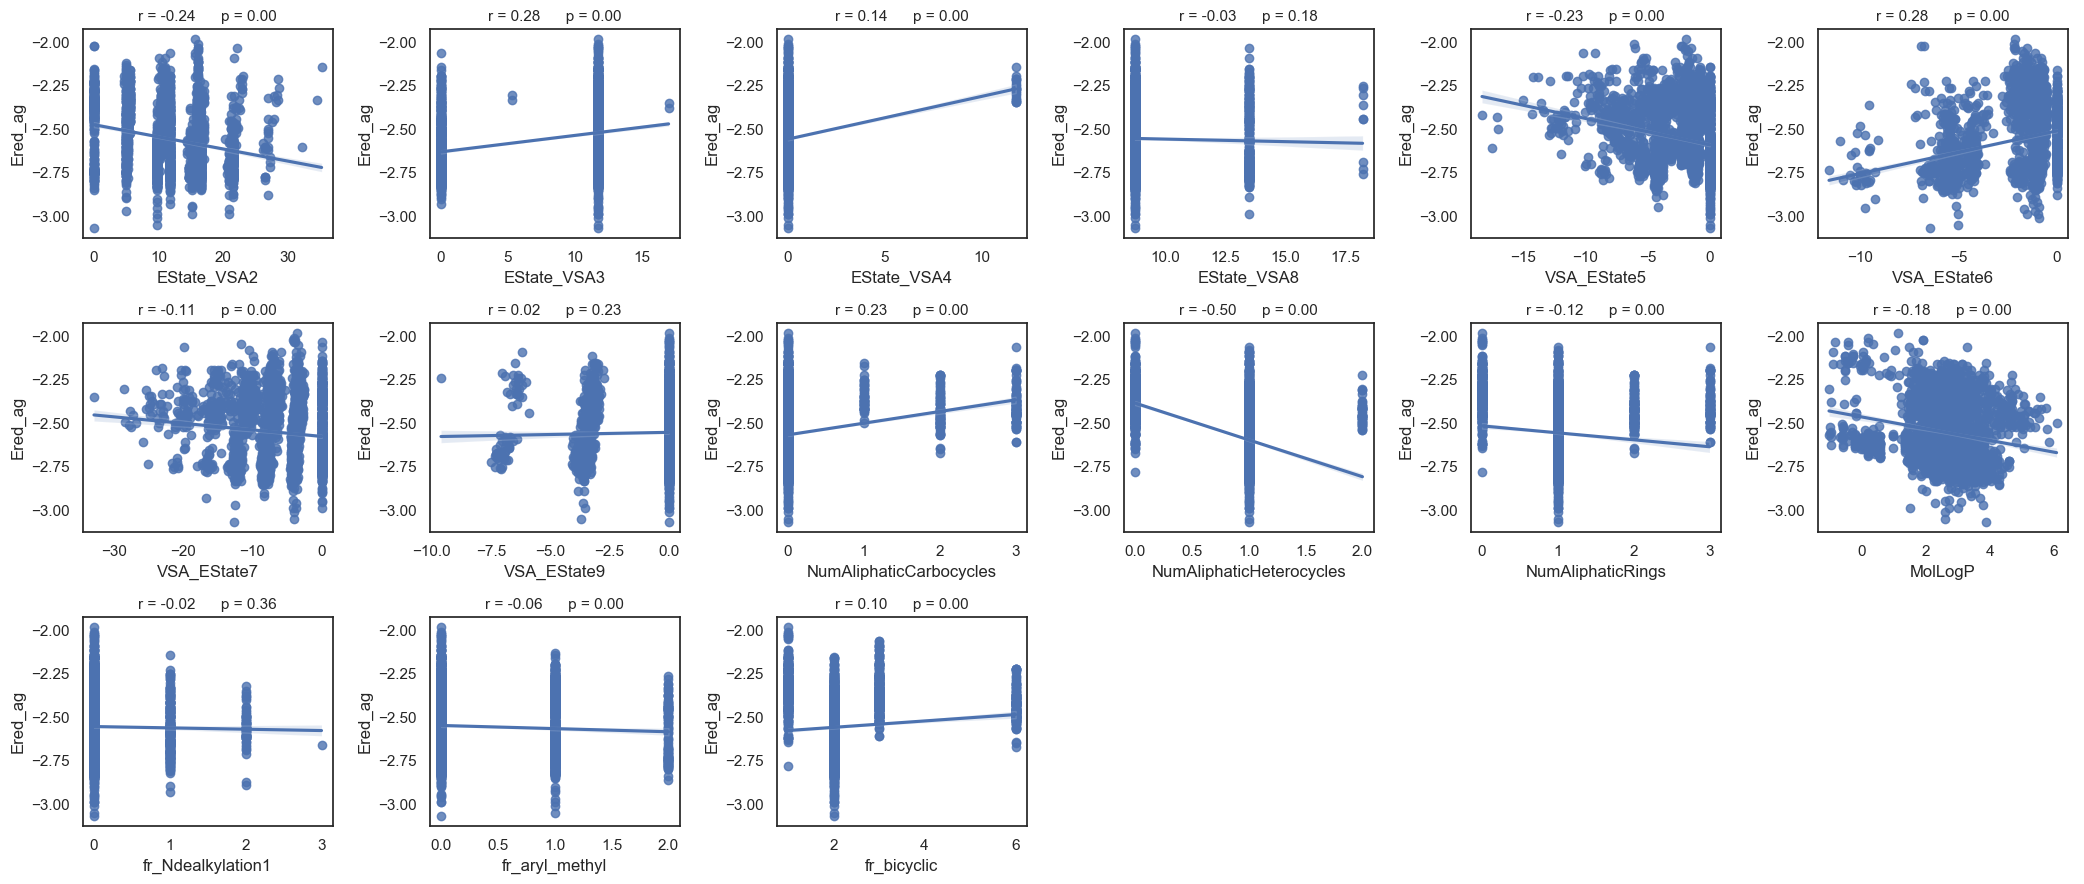

In [26]:
target = 'Ered_ag'
descriptors=df_rdkit_uncorr.columns
# corr_ered_feat=[]
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18+18
        
        if i < len(descriptors):
            
            sns.regplot(x=df_rdkit_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            # print(f"r={r},c={c},axs[r={r}][c={c}]={axs[r][c]}")
            stp = stats.pearsonr(df_rdkit_uncorr[descriptors[i]], ERed_data[target])
            corr_ered_feat.append([i,stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            if type(stp[0]) is not int:
                corr_ered_feat.append([descriptors[i],stp[0]])
            
            axs[r][c].set_title(str_title,fontsize=11)
        else:
            fig.delaxes(axs[r][c])

plt.tight_layout()    
plt.savefig(folder_path+"Ered_features_37to54_pearsons.png",dpi=300)
plt.show()  

# 55 to 63 out of the 63 features

In [27]:
target = 'Ered_ag'
descriptors=df_rdkit_uncorr.columns
# corr_ered_feat=[]
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18+18+18
        
        if i < len(descriptors):
            
            sns.regplot(x=df_rdkit_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            # print(f"r={r},c={c},axs[r={r}][c={c}]={axs[r][c]}")
            stp = stats.pearsonr(df_rdkit_uncorr[descriptors[i]], ERed_data[target])
            corr_ered_feat.append([i,stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            if type(stp[0]) is not int:
                corr_ered_feat.append([descriptors[i],stp[0]])
            
            axs[r][c].set_title(str_title,fontsize=11)
        else:
            fig.delaxes(axs[r][c])

plt.tight_layout()    
plt.savefig(folder_path+"Ered_features_55to63_pearsons.png",dpi=300)
plt.show()  

<Figure size 2100x900 with 0 Axes>

# 30 (15+15) Descriptors with a high positive and negative pearson's corre. coeff.

In [28]:
corr_ered_feat=pd.DataFrame(corr_ered_feat,columns=["Descriptors","Pearsons"])

remove_desc2=[i for i,desc in enumerate(corr_ered_feat["Descriptors"]) if type(desc) is int]
corr_ered_feat=corr_ered_feat.drop(remove_desc2)
corr_ered_feat_sorted=corr_ered_feat.dropna(axis=0).sort_values("Pearsons")

# Select most dominant features

In [29]:
df_reducedDescp=pd.concat([corr_ered_feat_sorted[:15],corr_ered_feat_sorted[-15:]])

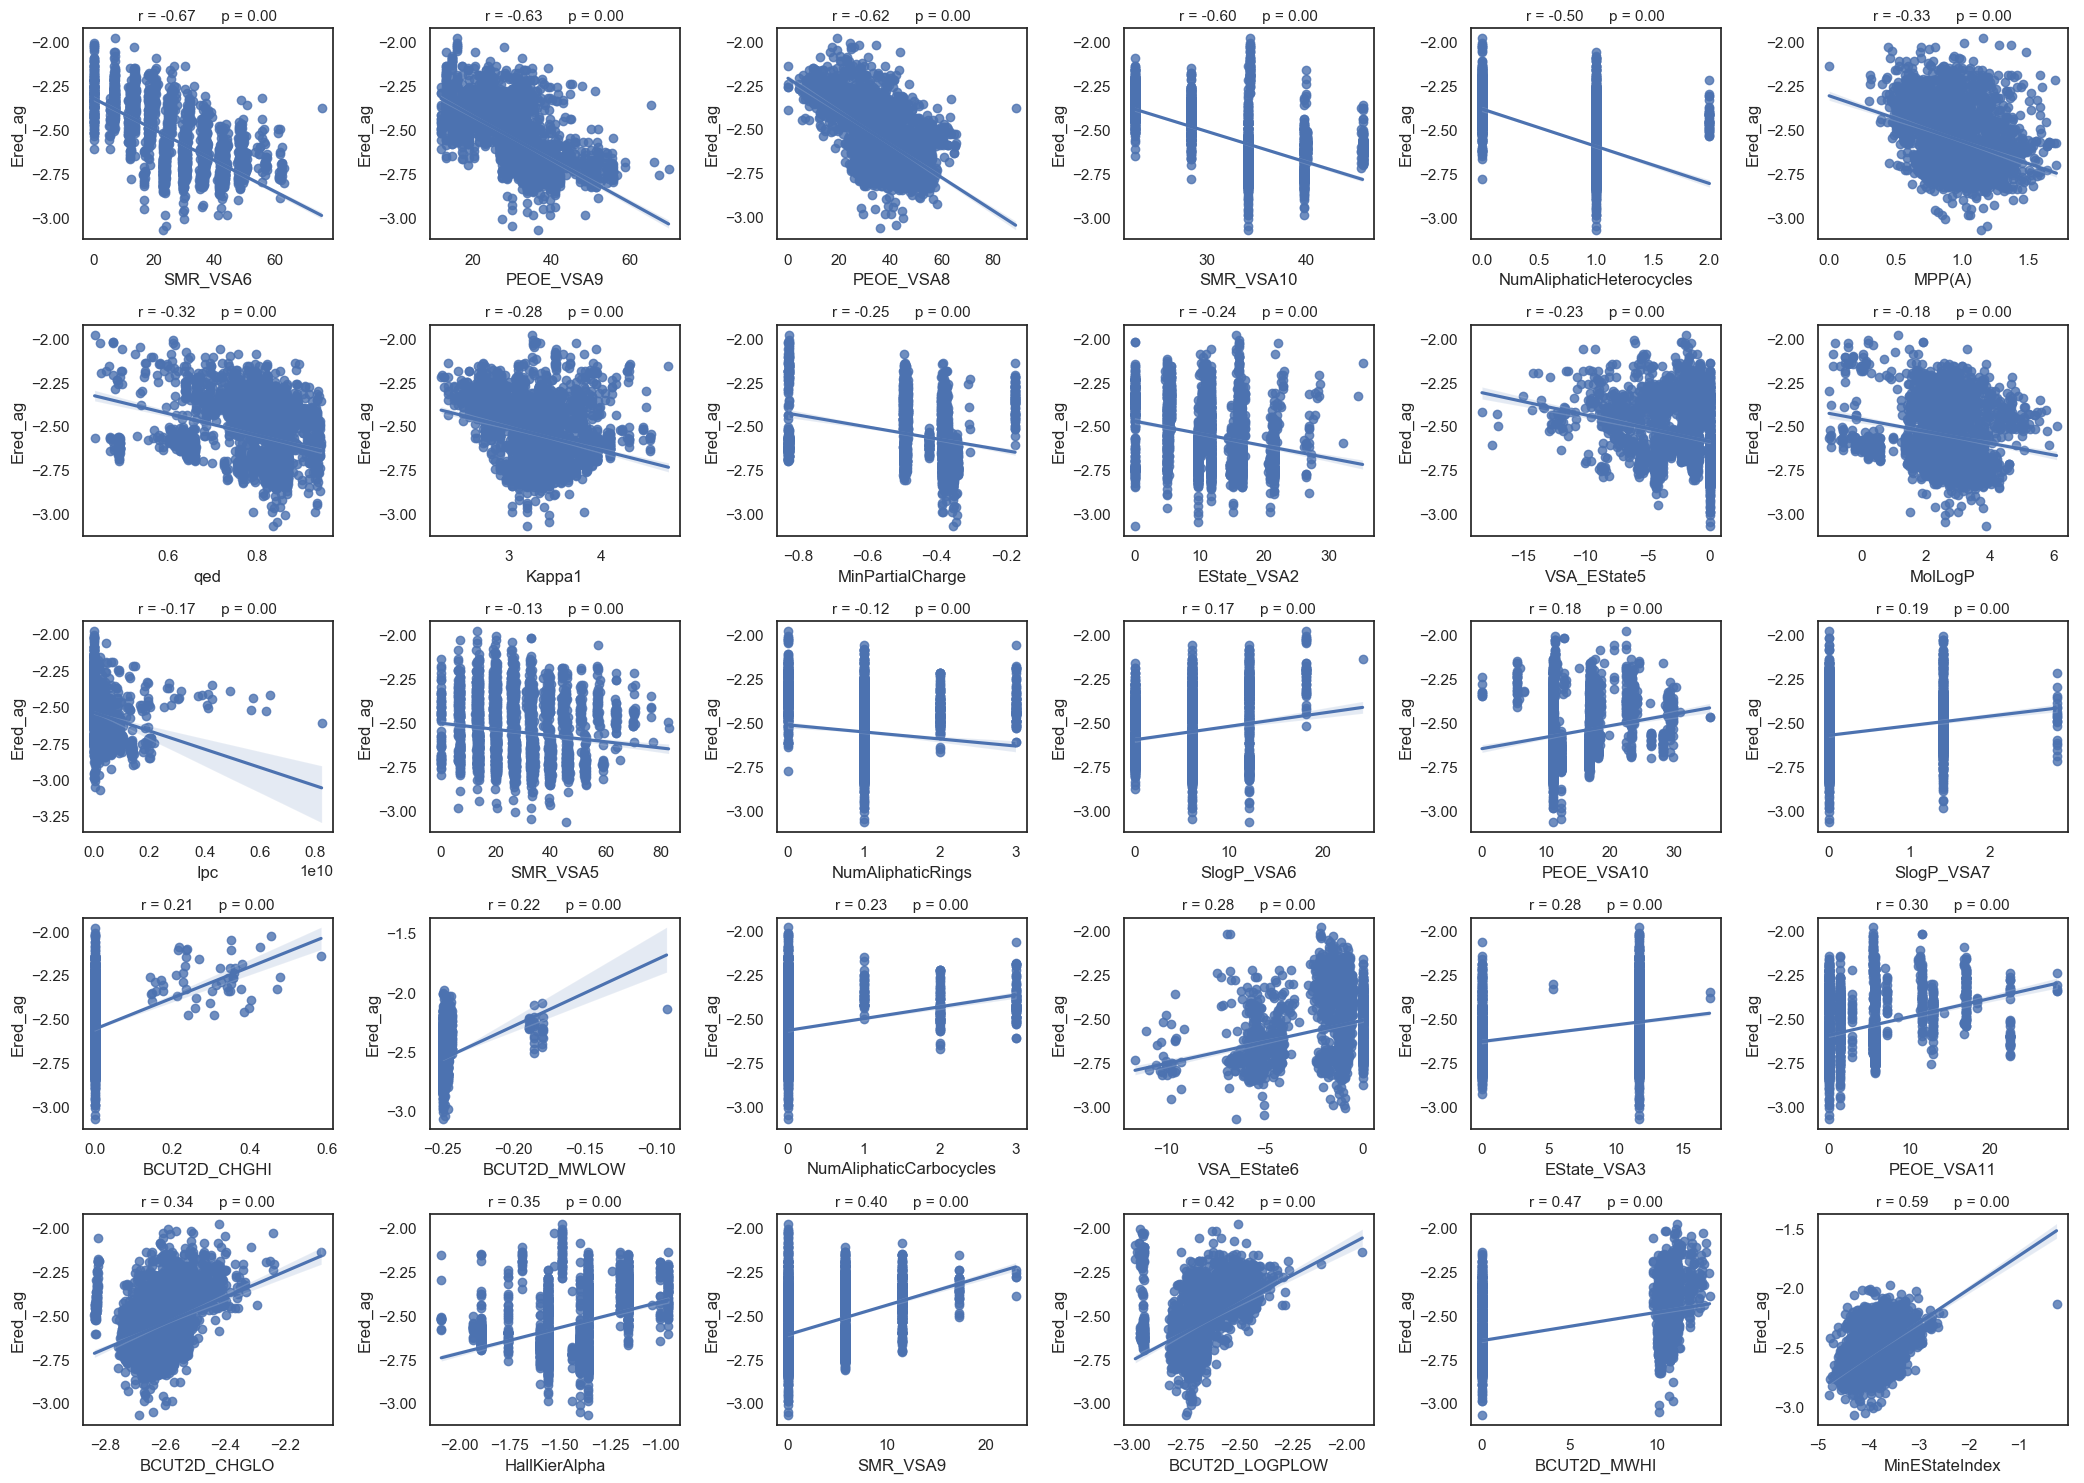

In [30]:
target = 'Ered_ag'
descriptors=df_reducedDescp.Descriptors.to_list()

nr_rows = 5
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(descriptors):

            # print(i,descriptors[i])
            sns.regplot(x=df_rdkit_uncorr[descriptors[i]], y=ERed_data[target], ax = axs[r][c])
            
            stp = stats.pearsonr(df_rdkit_uncorr[descriptors[i]], ERed_data[target])
            # corr_ered_feat.append([descriptors[i],stp[0]])
            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            corr_ered_feat.append([descriptors[i],stp[0]])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.savefig(folder_path+"Ered_and_30dominat_features.png",dpi=300)
plt.show()  

# Additional geometric and structural features and ERed
- MPP displays a weak negative correlation with the Ered_ag
- nHring5 (Number of hetrorings of size 5) and nring5 (number of 5 membered rings) shows a relatively stronger negative correlation with the Ered_ag than MPP
- nHring6 (Number of hetrorings of size 6), nhetro_O (number of O atoms in the heterorings), nring6 (number of 6 membered rings) displays a weak positive correlation with the Ered_ag

# Make two feature sets, (1) only 30 dominant features and (2) all 63 features

In [31]:
df_rdkit_uncorr_30=df_rdkit_uncorr.loc[:,df_reducedDescp["Descriptors"].to_list()]

# Check GPR model (GPytorch implementation) performance

In [32]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C ,WhiteKernel as Wht,Matern as matk

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


import torch, gpytorch
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

# Machine learning-realated functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # For normalizing inputs
from sklearn.decomposition import PCA # Principle component analysis

In [33]:
def gpregression_pytorch(X_train,y_train,num_iter=200,learning_rate=0.1,verbose=False):
    
    """
    Gaussian Process Regression implementation with the GPyTorch
    
    Input: gpregression_pytorch(X_train,y_train,num_iter,learning_rate)
    
    Retrun: trained_model, trained_likelihood

    """
    # nfeatures=X_train.shape[1]
    train_x=torch.from_numpy(np.array(X_train))
    train_y=torch.from_numpy(np.array(y_train))
    torch.set_default_dtype(torch.float64)

    # We will use the simplest form of GP model, exact inference
    class ExactGPModel(gpytorch.models.ExactGP):

        def __init__(self, train_x, train_y, likelihood):
            super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
            self.mean_module = gpytorch.means.ConstantMean()
 
            self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=1.5))
        
        def forward(self, x):
            mean_x = self.mean_module(x)
            covar_x = self.covar_module(x)
            return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

    # initialize likelihood and model
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGPModel(train_x, train_y, likelihood)

    # this is for running the notebook in our testing framework
    import os
    smoke_test = ('CI' in os.environ)
    training_iter = 2 if smoke_test else num_iter


    # Find optimal model hyperparameters
    model.train()
    likelihood.train()

    # Use the adam optimizer # for hyperparameter tuning
    optimizer = torch.optim.Adam([
        {'params': model.parameters()},  # Includes GaussianLikelihood parameters
    ], lr=learning_rate)

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    for i in range(training_iter):
        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(train_x)
        # Calc loss and backprop gradients
        loss = -mll(output, train_y)
        loss.backward()
        if verbose*1*((i+1)%50==0 or i==0):
            print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (i + 1, training_iter, loss.item(),model.covar_module.base_kernel.lengthscale.item(),model.likelihood.noise.item()))
            # print('Iter %d/%d - Loss: %.3f    noise: %.3f' % (i + 1, training_iter, loss.item(),model.likelihood.noise.item()))
        optimizer.step()

    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval()

    return model,likelihood

def gprediction_pytorch(model,likelihood,X_test):
    
    """
    Gaussian Process Predictions with gpr_pytorch
    
    Use: 
    model, likelihood = gpregression_pytorch(X_train,y_train,num_iter=200,learning_rate=0.1)  
    ypred, ysigma = gprediction__pytorch(model,likelihood,X_test)

    Return: ypred and ysigma numpy arrays
    
    """
    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval()
    # Make predictions by feeding model through likelihood
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        test_x = torch.from_numpy(np.array(X_test))
        torch.set_default_dtype(torch.float64)
        observed_pred = likelihood(model(test_x))
        ypred = observed_pred.mean.numpy()
        ysigma = observed_pred.stddev.numpy()
    return ypred,ysigma

In [34]:
def do_pca(xtrain=None, xtest=None, rvar=None, npc=None):
    """
    Usage: do_pca(xtrain=xtrain, xtest=test) 
    Caution: Do test_train_split and scaling before pca
    Return: Transformed xtrain and xtest if they are not None
    """
    
    if xtrain is not None:
        
        pca = PCA().fit(xtrain)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if rvar is not None and npc is None:
            n_comp = 1+np.nonzero(evr > rvar)[0][0]
            print(str(n_comp)+" principal components can describe > "+ str(rvar*100)+ "% of variance in the data")
        elif rvar is None and npc is not None:
            n_comp = npc

        
        print("Selected "+str(n_comp)+" components for PCA")
        
        # col=[]
        # for i in range(1,1+n_comp,1):
        #     col.append("PC"+str(i))

        pca = PCA(n_components=n_comp)
        xtrain = pca.fit_transform(xtrain) 
        # xtrain=pd.DataFrame(xtrain,columns=col)

        if xtest is not None:
            
            xtest=pca.transform(xtest)
            # xtest=pd.DataFrame(xtest,columns=col)
            print("returning pca transformed train and test data")
            return xtrain,xtest
        else:
            print("test data is not provided, returning only transformed train data")
            return xtrain
    else:
        print("Give train data, returning None")
        return xtrain,xtest

In [35]:
from sklearn.preprocessing import StandardScaler, RobustScaler
def do_scaling(scaler=StandardScaler(), xtrain=None, xtest=None):
    """
    Usage: do_scaling(scaler=MinMaxScaler(), xtrain=xtrain, xtest=test) 
    xtrain and xtest are pd.Dataframes
    Caution: Do test_train_split before scaling
    Return: return scaled non-None xtrain and xtest
    """
    st = scaler

    if xtrain is not None:
        col=xtrain.columns.values.tolist()
        xtrain=st.fit_transform(xtrain)  
        xtrain=pd.DataFrame(xtrain,columns=col)

        if xtest is not None:
            
            xtest=st.transform(xtest)
            xtest=pd.DataFrame(xtest,columns=col)
            print("returning scaled train and test data")
            return xtrain,xtest
        else:
            print("test data is not provided, returning only scaled train data")
            return xtrain
    else:
        print("Give train data, returning None")
        return xtrain,xtest

In [36]:
def gpr_one_pytorch(X,y,train_pc=0.8):

    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_pc) 

    xtrain, xtest = do_scaling(scaler=RobustScaler(),xtrain=X_train, xtest=X_test)

    model, likelihood = gpregression_pytorch(xtrain,y_train,verbose=False)
    
    ypred_test, yerr_test = gprediction_pytorch(model,likelihood,xtest)
    ypred_train, yerr_train = gprediction_pytorch(model,likelihood,xtrain)
    
    return y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train

In [37]:
def plot_Ered_gpr(y_true_train,y_pred_train,y_true_test,y_pred_test,y_pred_err_train=None,y_pred_err_test=None,err_bar=False,showfig=True,savefig=False,filename="gpr_pred.png",data=True):
    """
    Return r2,rmse and mae score if data = True
    Show image if showfig=True
    Save image if savefig=True
    """
    
    mae_train = round(MAE(y_true_train,y_pred_train),2)
    r2_train = round(r2_score(y_true_train,y_pred_train),2)
    rmse_train = round(np.sqrt(MSE(y_true_train,y_pred_train)),2)

    mae_test = round(MAE(y_true_test,y_pred_test),2)
    r2_test = round(r2_score(y_true_test,y_pred_test),2)
    rmse_test = round(np.sqrt(MSE(y_true_test,y_pred_test)),2)
     
    if showfig:
        plt.figure(figsize=(6, 6)) 
        plt.tick_params(reset=True)

        if err_bar*(y_pred_err_train is not None):
            plt.errorbar(y_true_train,y_pred_train,yerr=y_pred_err_train,color="red",fmt='o',label="Train")

        if err_bar*(y_pred_err_test is not None):
            plt.errorbar(y_true_test,y_pred_test,yerr=y_pred_err_test,color="blue",fmt='o',label="Test")

        plt.plot([y_true_train.min()-0.2,y_true_train.max()+0.2],[y_true_train.min()-0.2,y_true_train.max()+0.2],color='black')
        
        string=f"$R^2$={r2_train:0.2f}, RMSE = {rmse_train:0.2f}"
        plt.text(y_true_train.min()-0.1,y_true_train.max()-0.03,string,color='red')
        

        string=f"$R^2$={r2_test:0.2f}, RMSE = {rmse_test:0.2f}"
        plt.text(y_true_train.min()-0.1,y_true_train.max()-0.15,string,color="blue")

        plt.rc('font', size=20)
        plt.xlabel('DFT calculated values (V)')
        plt.ylabel('GPR Predicted values (V)')
        plt.xlim([y_true_train.min()-0.1,y_true_train.max()+0.1])
        plt.ylim([y_true_train.min()-0.1,y_true_train.max()+0.1])
        plt.xticks(np.arange(y_true_train.min()-0.1,y_true_train.max()+0.1,0.4))        
        plt.yticks(np.arange(y_true_train.min()-0.1,y_true_train.max()+0.1,0.4))
        
        plt.legend(loc='lower right') #best
        plt.tight_layout()
        
        if savefig:
            plt.savefig(filename,dpi=300,bbox_inches='tight')
        plt.show()


    if data:
        return r2_test,rmse_test,mae_test,r2_train,rmse_train,mae_train

# with all 63 features (no PCA for now)
## 80% train and 20% test data

In [38]:
X=df_rdkit_uncorr
y=ERed_data["Ered_ag"]
# 
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pytorch(X=X,y=y,train_pc=0.8)


returning scaled train and test data


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


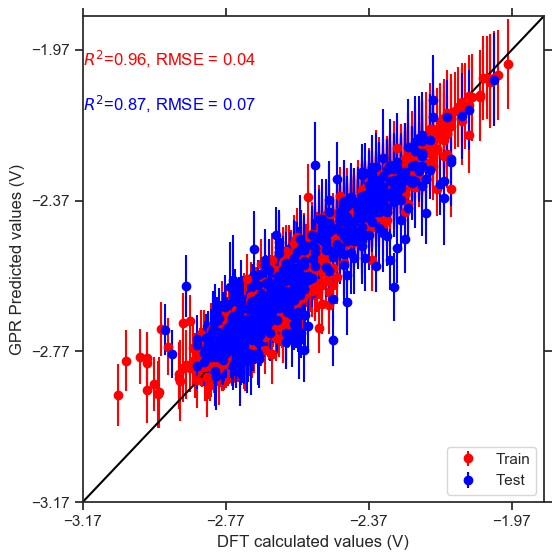

In [39]:
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=True,filename=folder_path+"GPR_noPCA_63feat.png",data=False)

# With only 30 dominant features (no PCA)
# 80%-20% train-test split

In [40]:
X=df_rdkit_uncorr_30
y=ERed_data["Ered_ag"]
# 
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pytorch(X=X,y=y,train_pc=0.8)


returning scaled train and test data


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


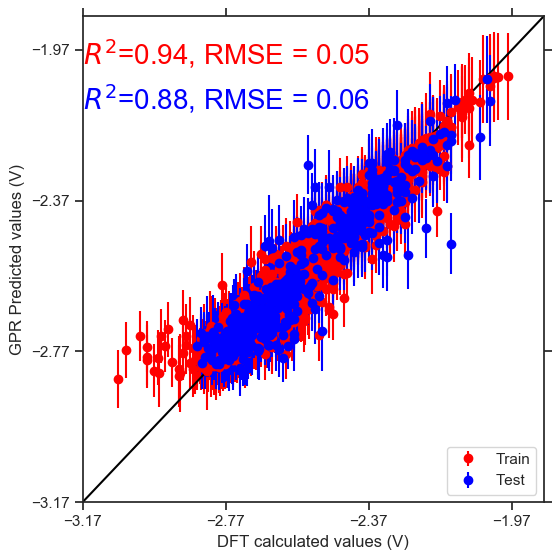

In [41]:
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=True,filename=folder_path+"GPR_noPCA_30feat.png",data=False)

# PCA with all 63 features  

In [42]:
# del X, X_st, pca

test data is not provided, returning only scaled train data


C:\Users\jaina\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


No. of PC           Cumulative variance                                                             
--------------------------------------------------
1                   0.315726                                                                        
2                   0.495248                                                                        
3                   0.608605                                                                        
4                   0.679871                                                                        
5                   0.730625                                                                        
6                   0.776097                                                                        
7                   0.813650                                                                        
8                   0.845522                                                                        
9                   0.865504            

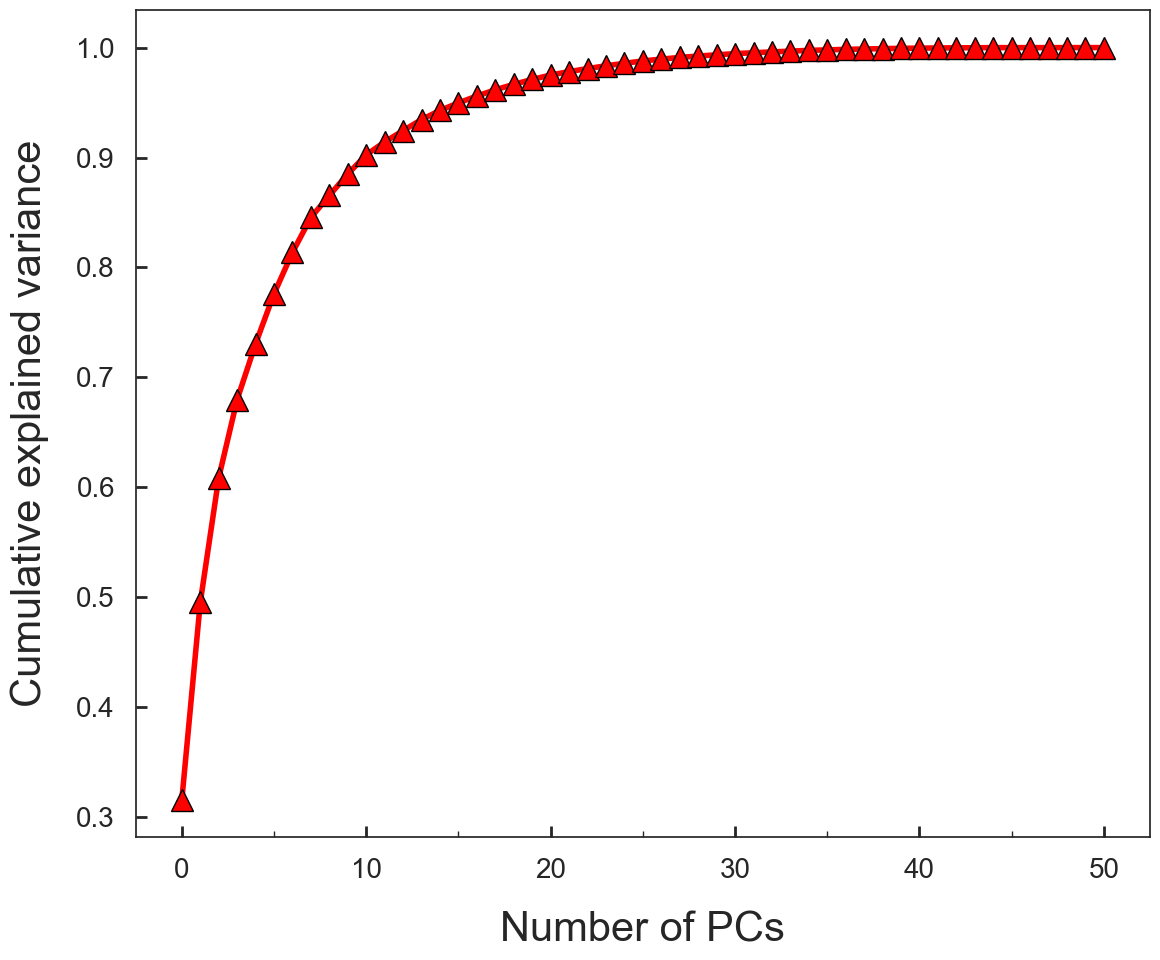

In [43]:
from sklearn.decomposition import PCA # Principle component analysis
import matplotlib.pyplot as plt  
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)


X=df_rdkit_uncorr

X_st= do_scaling(scaler=RobustScaler(),xtrain=X, xtest=None)
pca = PCA().fit(X_st)

#Plotting
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of PCs', fontsize=30,labelpad=20)
ax1.set_ylabel('Cumulative explained variance', fontsize=30,labelpad=20)
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.tick_params(axis='both', which='major', direction='in', size=8, left='on', bottom='on', width=2, pad=15)
ax1.tick_params(axis='both', which='minor', direction='in', size=4, left='on', bottom='on',width=1, pad=15)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(axis="x", labelsize=20)

plt.gcf().set_size_inches((12, 10))
evr = np.cumsum(pca.explained_variance_ratio_)
ax1.plot(evr, marker='^',markersize=16, markeredgecolor='black', 
         linestyle='-',linewidth=4, color='red')   # Plotting
plt.tight_layout()
plt.savefig(folder_path+"pca_63features.png",dpi=300)
print('{:<20s}{:<80s}'.format('No. of PC','Cumulative variance'))
print(50*'-')
for i,a in enumerate(evr):
    if a<=1:
        print('{:<20d}{:<80f}'.format(i+1,a))

# PCA with 30 features 

In [44]:
del X, X_st, pca

test data is not provided, returning only scaled train data


C:\Users\jaina\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


No. of PC           Cumulative variance                                                             
--------------------------------------------------
1                   0.448262                                                                        
2                   0.694823                                                                        
3                   0.779621                                                                        
4                   0.846279                                                                        
5                   0.884177                                                                        
6                   0.909515                                                                        
7                   0.927525                                                                        
8                   0.943422                                                                        
9                   0.952648            

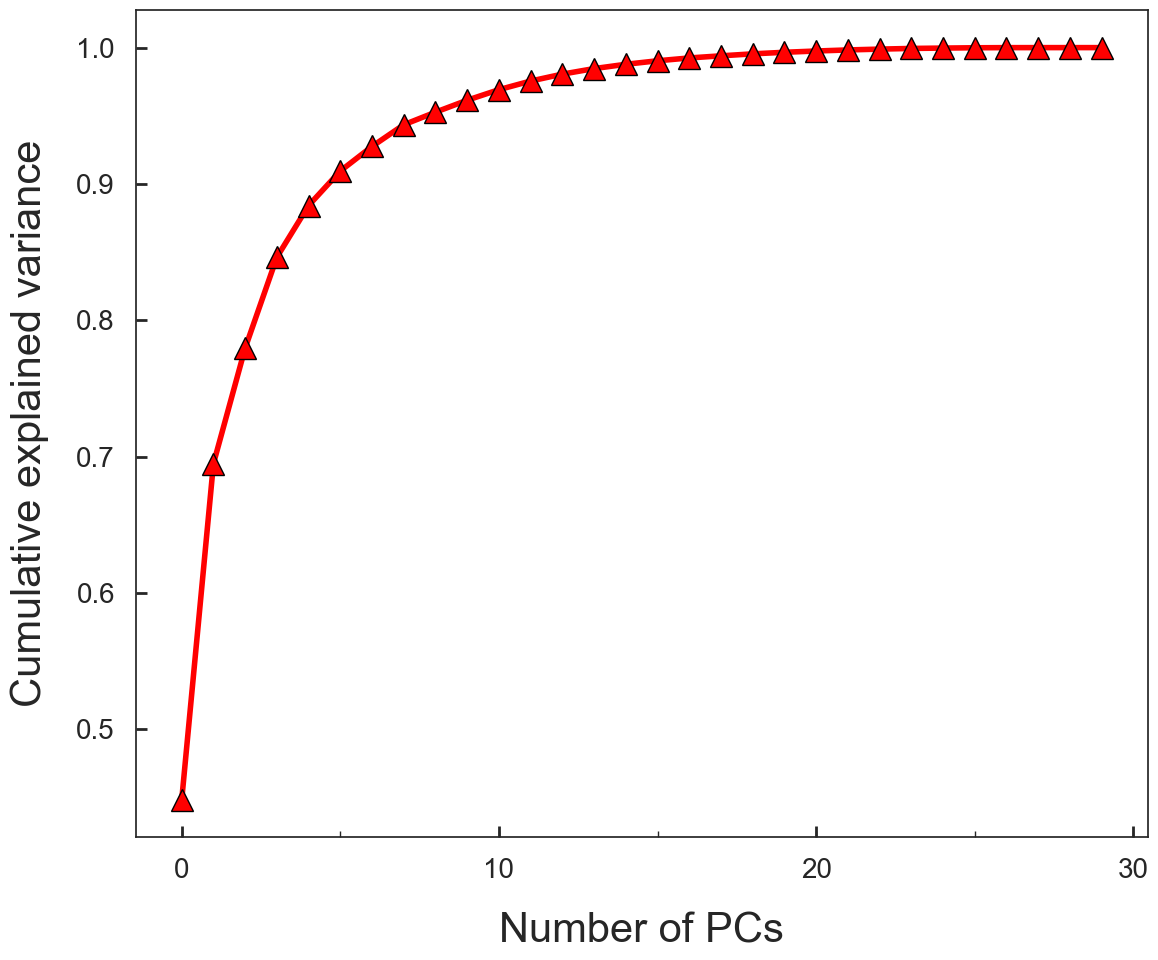

In [45]:
X=df_rdkit_uncorr_30

X_st= do_scaling(scaler=RobustScaler(),xtrain=X, xtest=None)
pca = PCA().fit(X_st)

#Plotting
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of PCs', fontsize=30,labelpad=20)
ax1.set_ylabel('Cumulative explained variance', fontsize=30,labelpad=20)
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.tick_params(axis='both', which='major', direction='in', size=8, left='on', bottom='on', width=2, pad=15)
ax1.tick_params(axis='both', which='minor', direction='in', size=4, left='on', bottom='on',width=1, pad=15)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(axis="x", labelsize=20)

plt.gcf().set_size_inches((12, 10))
evr = np.cumsum(pca.explained_variance_ratio_)
ax1.plot(evr, marker='^',markersize=16, markeredgecolor='black', 
         linestyle='-',linewidth=4, color='red')   # Plotting
plt.tight_layout()
plt.savefig(folder_path+"pca_30features.png",dpi=300)
print('{:<20s}{:<80s}'.format('No. of PC','Cumulative variance'))
print(50*'-')
for i,a in enumerate(evr):
    if a<=1:
        print('{:<20d}{:<80f}'.format(i+1,a))

# Distribution of Ered as a function of the 1st and 2nd PCs that describe most cumulative variance

## PCA with all 63 features

In [46]:
n_PC = 16  # Set number of principle components
pca = PCA(n_components=n_PC)
del X
X=df_rdkit_uncorr.copy()
X=do_scaling(xtrain=X)
Xdata = pca.fit_transform(X)  # Transform feature vectors to PCs

test data is not provided, returning only scaled train data


In [47]:
col_txt=["PC"+str(i+1) for i in np.arange(n_PC)]
df_xdata=pd.DataFrame(Xdata,columns=col_txt)
df_xdata.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-1.135524,0.851367,-3.865115,2.036778,0.805362,-0.536528,-0.695971,-3.598946,-0.924428,2.244545,6.150459,2.228896,-1.419692,0.937068,0.002270,1.208791
1,-0.376382,0.506584,-3.524538,2.161955,-1.077096,-0.601918,1.979472,-0.707972,0.011916,2.129094,1.517797,-0.646050,-0.413365,-1.374575,-1.257295,0.577560
2,-2.330115,1.650678,-3.141900,0.953909,1.298245,-0.937559,-1.811384,-1.055253,0.947004,-0.948840,0.619181,-1.327589,0.010644,-0.293328,-0.877989,0.165224
3,-2.695221,1.322168,-2.588197,1.276459,0.992033,0.042350,-1.342607,-0.938834,0.879469,-0.410319,0.469952,-0.774628,-0.774214,1.109221,-0.911396,-0.205240
4,-3.018485,1.391360,-2.975750,0.950776,1.211755,-1.005941,-1.725561,-0.884274,1.106762,-1.096001,0.826873,-1.259462,0.315669,-0.237027,-0.732991,0.555897


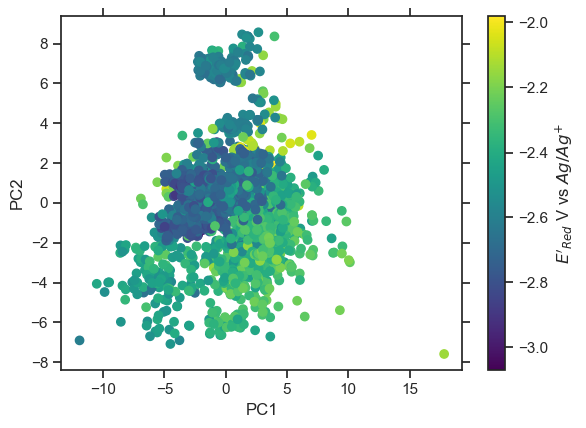

In [48]:
plt.tick_params(reset=True)
plt.scatter(x=df_xdata.PC1,y=df_xdata.PC2,c=ERed_data.Ered_ag,cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.rc('font', size=24) 
plt.colorbar(label="$E\'_{Red}$ V vs $Ag/Ag^{+}$")

plt.tight_layout()
plt.savefig(folder_path+"PC1_PC2_ERed_Ag_with63feat_PCA.png",dpi=300)
plt.show()

# PCA with 30feat

In [49]:
n_PC = 16  # Set number of principle components
pca = PCA(n_components=n_PC)
del X
X=df_rdkit_uncorr_30.copy()
X=do_scaling(xtrain=X)
Xdata = pca.fit_transform(X)  # Transform feature vectors to PCs

test data is not provided, returning only scaled train data


In [50]:
col_txt=["PC"+str(i+1) for i in np.arange(n_PC)]
df_xdata_30=pd.DataFrame(Xdata,columns=col_txt)
df_xdata_30.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-1.936545,-0.589975,-2.393525,-0.365208,0.231287,-0.541152,2.016460,0.945546,-0.421038,0.174084,1.404002,-0.640110,0.445650,-0.434619,-0.681360,-1.269493
1,-1.751881,-0.467534,-2.381533,-0.859539,0.329653,-0.323209,1.886063,1.277174,-0.024605,-0.034590,0.833480,-0.211207,0.329486,0.310940,0.279837,-1.199366
2,-3.601684,-0.541946,-1.837812,0.569200,0.326892,-0.302128,0.350843,-1.801584,1.296952,-0.026885,-0.645019,-0.328048,-0.751850,-0.309587,-0.565878,0.152395
3,-3.410471,-0.485178,-1.483381,0.121067,0.897799,-1.061870,0.546927,-1.156130,0.869073,0.321565,0.603872,-0.283852,0.412974,-0.316746,-0.352214,-0.413852
4,-4.066354,-0.124475,-1.552145,0.319964,-0.079565,-0.050536,0.386787,-1.805009,1.410687,-0.214643,-0.153435,0.184400,-0.414809,-0.342784,-0.600946,0.089230


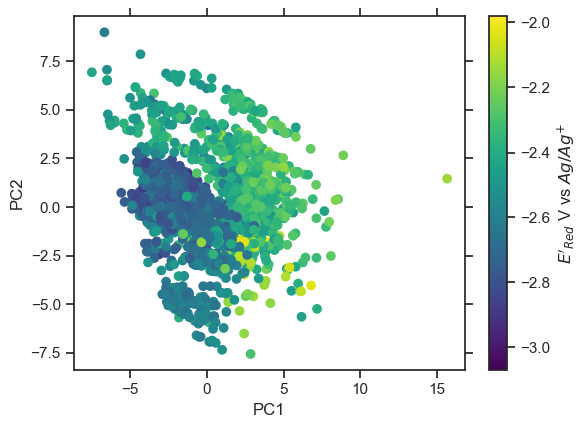

In [51]:
plt.tick_params(reset=True)
plt.scatter(x=df_xdata_30.PC1,y=df_xdata_30.PC2,c=ERed_data.Ered_ag,cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.rc('font', size=24) 
plt.colorbar(label="$E\'_{Red}$ V vs $Ag/Ag^{+}$")

plt.tight_layout()
plt.savefig(folder_path+"PC1_PC2_ERed_Ag_with30feat_PCA.png",dpi=300)
plt.show()

# Learning curves for num_PCs and train-test split%
## 17 or more PCs made with 30 dominant features can describe at least 99% cumulative variance in data
## 29 or more PC made with 63 features can describe at least 99% cumulative variance in data
## Hence, using only 30 dominant features to obtain learning curves


In [52]:
def gpr_one_pca_pytorch(X,y,train_pc=0.8,nPC=5,random_state=None):

    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=train_pc,random_state=random_state) 

    xtrain, xtest = do_scaling(scaler=RobustScaler(),xtrain=X_train, xtest=X_test)
    # PCA
    n_PC = nPC  # Set number of principle components
    pca = PCA(n_components=n_PC)
        
    xtrain = pca.fit_transform(xtrain) 
    xtest=pca.transform(xtest)
    # print(f"xtrain.shape={xtrain.shape},xtest.shape={xtest.shape}")
    model, likelihood = gpregression_pytorch(xtrain,y_train,verbose=False)
    
    ypred_test, yerr_test = gprediction_pytorch(model,likelihood,xtest)
    ypred_train, yerr_train = gprediction_pytorch(model,likelihood,xtrain)
    
    return y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train

In [53]:
def helper(X,y,nPC=5,train_pc=0.8,random_state=None):
    y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_pc=train_pc,nPC=nPC,random_state=random_state)
    r2_test,rmse_test,mae_test,r2_train,rmse_train,mae_train=plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=False,savefig=False,data=True)
    return r2_test,rmse_test,mae_test,r2_train,rmse_train,mae_train

In [54]:
train_pcs = [0.2, 0.4, 0.6, 0.8 , 0.9]
num_PCs = [5, 10, 17, 25, df_rdkit_uncorr_30.shape[1]]

In [55]:
train_pcs_avg_train_score=np.zeros([len(train_pcs),len(num_PCs),3])
train_pcs_avg_test_score=np.zeros([len(train_pcs),len(num_PCs),3])
train_pcs_std_train_score=np.zeros([len(train_pcs),len(num_PCs),3])
train_pcs_std_test_score=np.zeros([len(train_pcs),len(num_PCs),3])

# Be patient next block of code will take time to complete
## will repeat experiments 10 times to get statistics

In [56]:
from tqdm import tqdm
import time

In [57]:
%%capture
repeats=10
for jdx,tr_pc in enumerate(tqdm(train_pcs,position=0, desc="train_pcs", leave=False, colour='green', ncols=80)):

    avg_train_score = np.zeros([len(num_PCs),3])
    avg_test_score = np.zeros([len(num_PCs),3])

    std_train_score = np.zeros([len(num_PCs),3])
    std_test_score = np.zeros([len(num_PCs),3])

    for idx,PCs in enumerate(tqdm(num_PCs,position=1,desc="num_PCs", leave=False, colour='blue', ncols=80)):

        X=df_rdkit_uncorr_30
        y=ERed_data.Ered_ag.to_list()
        
        
        r2_train,rmse_train,mae_train=np.zeros(repeats),np.zeros(repeats),np.zeros(repeats)
        r2_test,rmse_test,mae_test=np.zeros(repeats),np.zeros(repeats),np.zeros(repeats)

        for j in tqdm(np.arange(repeats),position=2,desc="repeats",leave=False,colour="red",ncols=80):
            # print(f" ---> %repeat <-- ={100*j/repeats}")
            r2_test[j],rmse_test[j],mae_test[j],r2_train[j],rmse_train[j],mae_train[j]=helper(X=X,y=y,nPC=PCs,train_pc=tr_pc)

        avg_test_score[idx] = r2_test.mean(),rmse_test.mean(),mae_test.mean()
        avg_train_score[idx] = r2_train.mean(),rmse_train.mean(),mae_train.mean()
        std_test_score[idx] = r2_test.std(),rmse_test.std(),mae_test.std()
        std_train_score[idx] = r2_train.std(),rmse_train.std(),mae_train.std()

    # store scores for each tr_pc
    train_pcs_avg_train_score[jdx] = avg_train_score
    train_pcs_avg_test_score[jdx] = avg_test_score
    train_pcs_std_train_score[jdx] = std_train_score
    train_pcs_std_test_score[jdx] = std_test_score

# Plot curves

In [58]:
y_r2_avg_tr_10_4pc=[train_pcs_avg_train_score[x][0][0] for x in np.arange(len(train_pcs))]
y_rmse_avg_tr_10_4pc=[train_pcs_avg_train_score[x][0][1] for x in np.arange(len(train_pcs))]
y_mae_avg_tr_10_4pc=[train_pcs_avg_train_score[x][0][2] for x in np.arange(len(train_pcs))]

y_r2_std_tr_10_4pc=[train_pcs_std_train_score[x][0][0] for x in np.arange(len(train_pcs))]
y_rmse_std_tr_10_4pc=[train_pcs_std_train_score[x][0][1] for x in np.arange(len(train_pcs))]
y_mae_std_tr_10_4pc=[train_pcs_std_train_score[x][0][2] for x in np.arange(len(train_pcs))]

y_r2_avg_tr_10_8pc=[train_pcs_avg_train_score[x][1][0] for x in np.arange(len(train_pcs))]
y_rmse_avg_tr_10_8pc=[train_pcs_avg_train_score[x][1][1] for x in np.arange(len(train_pcs))]
y_mae_avg_tr_10_8pc=[train_pcs_avg_train_score[x][1][2] for x in np.arange(len(train_pcs))]

y_r2_std_tr_10_8pc=[train_pcs_std_train_score[x][1][0] for x in np.arange(len(train_pcs))]
y_rmse_std_tr_10_8pc=[train_pcs_std_train_score[x][1][1] for x in np.arange(len(train_pcs))]
y_mae_std_tr_10_8pc=[train_pcs_std_train_score[x][1][2] for x in np.arange(len(train_pcs))]

y_r2_avg_tr_10_16pc=[train_pcs_avg_train_score[x][2][0] for x in np.arange(len(train_pcs))]
y_rmse_avg_tr_10_16pc=[train_pcs_avg_train_score[x][2][1] for x in np.arange(len(train_pcs))]
y_mae_avg_tr_10_16pc=[train_pcs_avg_train_score[x][2][2] for x in np.arange(len(train_pcs))]

y_r2_std_tr_10_16pc=[train_pcs_std_train_score[x][2][0] for x in np.arange(len(train_pcs))]
y_rmse_std_tr_10_16pc=[train_pcs_std_train_score[x][2][1] for x in np.arange(len(train_pcs))]
y_mae_std_tr_10_16pc=[train_pcs_std_train_score[x][2][2] for x in np.arange(len(train_pcs))]

y_r2_avg_tr_10_32pc=[train_pcs_avg_train_score[x][3][0] for x in np.arange(len(train_pcs))]
y_rmse_avg_tr_10_32pc=[train_pcs_avg_train_score[x][3][1] for x in np.arange(len(train_pcs))]
y_mae_avg_tr_10_32pc=[train_pcs_avg_train_score[x][3][2] for x in np.arange(len(train_pcs))]

y_r2_std_tr_10_32pc=[train_pcs_std_train_score[x][3][0] for x in np.arange(len(train_pcs))]
y_rmse_std_tr_10_32pc=[train_pcs_std_train_score[x][3][1] for x in np.arange(len(train_pcs))]
y_mae_std_tr_10_32pc=[train_pcs_std_train_score[x][3][2] for x in np.arange(len(train_pcs))]

y_r2_avg_tr_10_46pc=[train_pcs_avg_train_score[x][4][0] for x in np.arange(len(train_pcs))]
y_rmse_avg_tr_10_46pc=[train_pcs_avg_train_score[x][4][1] for x in np.arange(len(train_pcs))]
y_mae_avg_tr_10_46pc=[train_pcs_avg_train_score[x][4][2] for x in np.arange(len(train_pcs))]

y_r2_std_tr_10_46pc=[train_pcs_std_train_score[x][4][0] for x in np.arange(len(train_pcs))]
y_rmse_std_tr_10_46pc=[train_pcs_std_train_score[x][4][1] for x in np.arange(len(train_pcs))]
y_mae_std_tr_10_46pc=[train_pcs_std_train_score[x][4][2] for x in np.arange(len(train_pcs))]

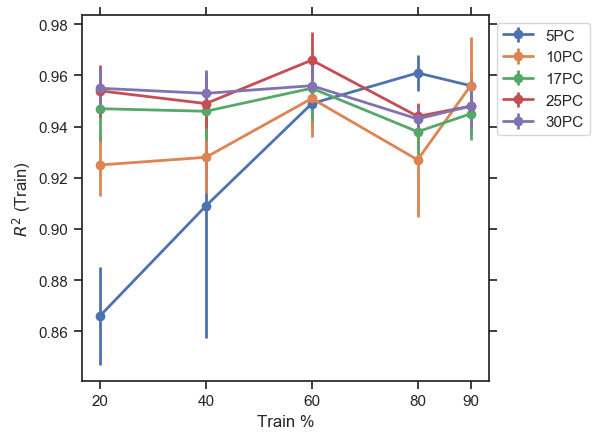

In [59]:
plt.tick_params(reset=True)
# plt.rcParams['ytick.labelsize'] = 25
# plt.rc('font', size=20) 
# plt.figure(figsize=(4,6))
train_pcs=np.array(train_pcs)
plt.errorbar(x=100*train_pcs,y=y_r2_avg_tr_10_4pc,yerr=y_r2_std_tr_10_4pc,label="5PC",fmt='-o',linewidth=2)
plt.errorbar(100*train_pcs,y_r2_avg_tr_10_8pc,yerr=y_r2_std_tr_10_8pc,fmt='-o',label="10PC",linewidth=2)
plt.errorbar(100*train_pcs,y_r2_avg_tr_10_16pc,yerr=y_r2_std_tr_10_16pc,fmt='-o',label="17PC",linewidth=2)
plt.errorbar(100*train_pcs,y_r2_avg_tr_10_32pc,yerr=y_r2_std_tr_10_32pc,fmt='-o',label="25PC",linewidth=2)
plt.errorbar(100*train_pcs,y_r2_avg_tr_10_46pc,yerr=y_r2_std_tr_10_46pc,fmt='-o',label=f"30PC",linewidth=2)
plt.rc('font', size=20) 
plt.xlabel("Train %")
plt.ylabel("$R^{2}$ (Train)")
plt.xticks(100*train_pcs)
# plt.legend(l)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.savefig(folder_path+"r2_train_learning_curve_train_test_30feat_PCA.png",dpi=300)

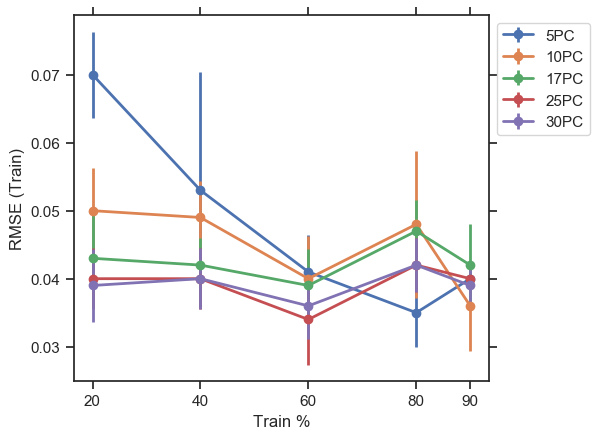

In [60]:
plt.tick_params(reset=True)
plt.errorbar(x=100*train_pcs,y=y_rmse_avg_tr_10_4pc,yerr=y_rmse_std_tr_10_4pc,label="5PC",fmt='-o',linewidth=2)
plt.errorbar(100*train_pcs,y_rmse_avg_tr_10_8pc,yerr=y_rmse_std_tr_10_8pc,fmt='-o',label="10PC",linewidth=2)
plt.errorbar(100*train_pcs,y_rmse_avg_tr_10_16pc,yerr=y_rmse_std_tr_10_16pc,fmt='-o',label="17PC",linewidth=2)
plt.errorbar(100*train_pcs,y_rmse_avg_tr_10_32pc,yerr=y_rmse_std_tr_10_32pc,fmt='-o',label="25PC",linewidth=2)
plt.errorbar(100*train_pcs,y_rmse_avg_tr_10_46pc,yerr=y_rmse_std_tr_10_46pc,fmt='-o',label="30PC",linewidth=2)

plt.rc('font', size=20) 
plt.xlabel("Train %")
plt.ylabel("RMSE (Train)")
plt.xticks(100*train_pcs)
# plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.savefig(folder_path+"rmse_train_learning_curve_train_test_30feat_PCA.png",dpi=300)

In [61]:
# save numpy array as npy file
from numpy import asarray
from numpy import save

# save to npy file
save(folder_path+'train_pcs_avg_test_score.npy', train_pcs_avg_test_score)
save(folder_path+'train_pcs_avg_train_score.npy', train_pcs_avg_train_score)
save(folder_path+'train_pcs_std_test_score.npy', train_pcs_std_test_score)
save(folder_path+'train_pcs_std_train_score.npy', train_pcs_std_train_score)

In [62]:
# # load numpy array from npy file
# from numpy import load
# # load array
# data = load(folder_path+'train_pcs_avg_test_score.npy')
# # print the array
# print(data)

In [63]:
y_r2_avg_ts_10_4pc=[train_pcs_avg_test_score[x][0][0] for x in np.arange(len(train_pcs))]
y_rmse_avg_ts_10_4pc=[train_pcs_avg_test_score[x][0][1] for x in np.arange(len(train_pcs))]
y_mae_avg_ts_10_4pc=[train_pcs_avg_test_score[x][0][2] for x in np.arange(len(train_pcs))]

y_r2_std_ts_10_4pc=[train_pcs_std_test_score[x][0][0] for x in np.arange(len(train_pcs))]
y_rmse_std_ts_10_4pc=[train_pcs_std_test_score[x][0][1] for x in np.arange(len(train_pcs))]
y_mae_std_ts_10_4pc=[train_pcs_std_test_score[x][0][2] for x in np.arange(len(train_pcs))]

y_r2_avg_ts_10_8pc=[train_pcs_avg_test_score[x][1][0] for x in np.arange(len(train_pcs))]
y_rmse_avg_ts_10_8pc=[train_pcs_avg_test_score[x][1][1] for x in np.arange(len(train_pcs))]
y_mae_avg_ts_10_8pc=[train_pcs_avg_test_score[x][1][2] for x in np.arange(len(train_pcs))]

y_r2_std_ts_10_8pc=[train_pcs_std_test_score[x][1][0] for x in np.arange(len(train_pcs))]
y_rmse_std_ts_10_8pc=[train_pcs_std_test_score[x][1][1] for x in np.arange(len(train_pcs))]
y_mae_std_ts_10_8pc=[train_pcs_std_test_score[x][1][2] for x in np.arange(len(train_pcs))]

y_r2_avg_ts_10_16pc=[train_pcs_avg_test_score[x][2][0] for x in np.arange(len(train_pcs))]
y_rmse_avg_ts_10_16pc=[train_pcs_avg_test_score[x][2][1] for x in np.arange(len(train_pcs))]
y_mae_avg_ts_10_16pc=[train_pcs_avg_test_score[x][2][2] for x in np.arange(len(train_pcs))]

y_r2_std_ts_10_16pc=[train_pcs_std_test_score[x][2][0] for x in np.arange(len(train_pcs))]
y_rmse_std_ts_10_16pc=[train_pcs_std_test_score[x][2][1] for x in np.arange(len(train_pcs))]
y_mae_std_ts_10_16pc=[train_pcs_std_test_score[x][2][2] for x in np.arange(len(train_pcs))]

y_r2_avg_ts_10_32pc=[train_pcs_avg_test_score[x][3][0] for x in np.arange(len(train_pcs))]
y_rmse_avg_ts_10_32pc=[train_pcs_avg_test_score[x][3][1] for x in np.arange(len(train_pcs))]
y_mae_avg_ts_10_32pc=[train_pcs_avg_test_score[x][3][2] for x in np.arange(len(train_pcs))]

y_r2_std_ts_10_32pc=[train_pcs_std_test_score[x][3][0] for x in np.arange(len(train_pcs))]
y_rmse_std_ts_10_32pc=[train_pcs_std_test_score[x][3][1] for x in np.arange(len(train_pcs))]
y_mae_std_ts_10_32pc=[train_pcs_std_test_score[x][3][2] for x in np.arange(len(train_pcs))]

y_r2_avg_ts_10_46pc=[train_pcs_avg_test_score[x][4][0] for x in np.arange(len(train_pcs))]
y_rmse_avg_ts_10_46pc=[train_pcs_avg_test_score[x][4][1] for x in np.arange(len(train_pcs))]
y_mae_avg_ts_10_46pc=[train_pcs_avg_test_score[x][4][2] for x in np.arange(len(train_pcs))]

y_r2_std_ts_10_46pc=[train_pcs_std_test_score[x][4][0] for x in np.arange(len(train_pcs))]
y_rmse_std_ts_10_46pc=[train_pcs_std_test_score[x][4][1] for x in np.arange(len(train_pcs))]
y_mae_std_ts_10_46pc=[train_pcs_std_test_score[x][4][2] for x in np.arange(len(train_pcs))]


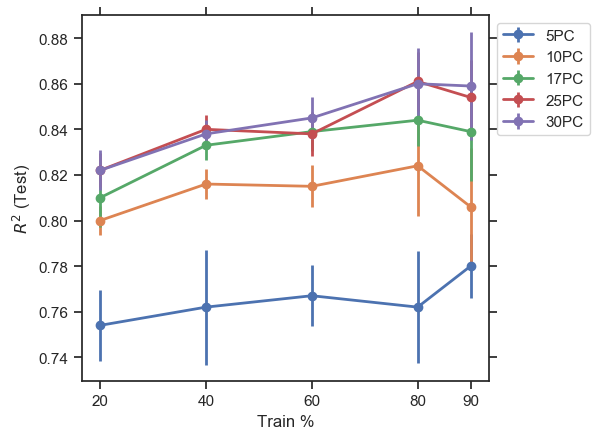

In [64]:
plt.tick_params(reset=True)
plt.errorbar(x=100*train_pcs,y=y_r2_avg_ts_10_4pc,yerr=y_r2_std_ts_10_4pc,label="5PC",fmt='-o',linewidth=2)
plt.errorbar(100*train_pcs,y_r2_avg_ts_10_8pc,yerr=y_r2_std_ts_10_8pc,fmt='-o',label="10PC",linewidth=2)
plt.errorbar(100*train_pcs,y_r2_avg_ts_10_16pc,yerr=y_r2_std_ts_10_16pc,fmt='-o',label="17PC",linewidth=2)
plt.errorbar(100*train_pcs,y_r2_avg_ts_10_32pc,yerr=y_r2_std_ts_10_32pc,fmt='-o',label="25PC",linewidth=2)
plt.errorbar(100*train_pcs,y_r2_avg_ts_10_46pc,yerr=y_r2_std_ts_10_46pc,fmt='-o',label="30PC",linewidth=2)
plt.rc('font', size=20) 
plt.xlabel("Train %")
plt.ylabel("$R^{2}$ (Test)")
plt.xticks(100*train_pcs)
# plt.legend(l)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.savefig(folder_path+"r2_test_learning_curve_train_test_30feat_PCA.png",dpi=300)

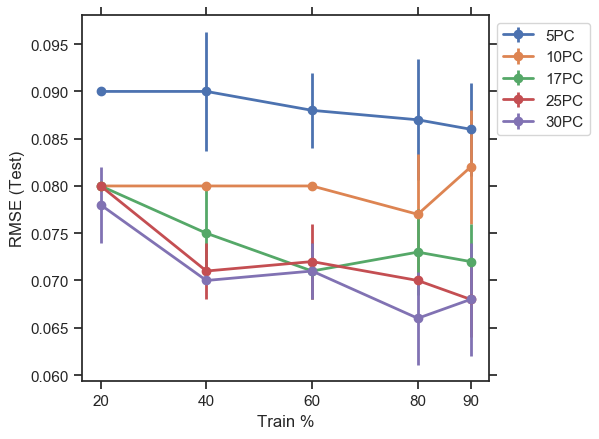

In [65]:
plt.tick_params(reset=True)
# plt.tick_params(axis='both',which='minor')
plt.errorbar(x=100*train_pcs,y=y_rmse_avg_ts_10_4pc,yerr=y_rmse_std_ts_10_4pc,label="5PC",fmt='-o',linewidth=2)
plt.errorbar(100*train_pcs,y_rmse_avg_ts_10_8pc,yerr=y_rmse_std_ts_10_8pc,fmt='-o',label="10PC",linewidth=2)
plt.errorbar(100*train_pcs,y_rmse_avg_ts_10_16pc,yerr=y_rmse_std_ts_10_16pc,fmt='-o',label="17PC",linewidth=2)
plt.errorbar(100*train_pcs,y_rmse_avg_ts_10_32pc,yerr=y_rmse_std_ts_10_32pc,fmt='-o',label="25PC",linewidth=2)
plt.errorbar(100*train_pcs,y_rmse_avg_ts_10_46pc,yerr=y_rmse_std_ts_10_46pc,fmt='-o',label="30PC",linewidth=2)

plt.rc('font', size=20) 
plt.xlabel("Train %")
plt.ylabel("RMSE (Test)")
plt.xticks(100*train_pcs)
# plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.tight_layout()
plt.savefig(folder_path+"rmse_test_learning_curve_train_test_30feat_PCA.png",dpi=300)

# Learning curve of PCs at a certain train-test% split

In [66]:
def plot_R2_learning_curve_num_PCs(num_PCs,avg_test_score,avg_train_score,std_test_score,std_train_score,filename="learning_r2.png"):
    plt.tick_params(reset=True)
    plt.plot(num_PCs,avg_train_score[:,0],"-o",label="train",color="blue")
    plt.plot(num_PCs,avg_test_score[:,0],"-o",label="test",color="red")

    plt.scatter(num_PCs,avg_train_score[:,0],color="blue")
    plt.scatter(num_PCs,avg_test_score[:,0],color="red")

    plt.errorbar(num_PCs,avg_train_score[:,0],yerr=std_train_score[:,0],color="blue")
    plt.errorbar(num_PCs,avg_test_score[:,0],yerr=std_test_score[:,0],color="red")

    plt.xlabel("Number of PCs")
    plt.ylabel("R$^2$")
    plt.legend()
    plt.xticks(num_PCs)
    plt.tight_layout()
    plt.savefig(filename,dpi=300)

train% = 0.80


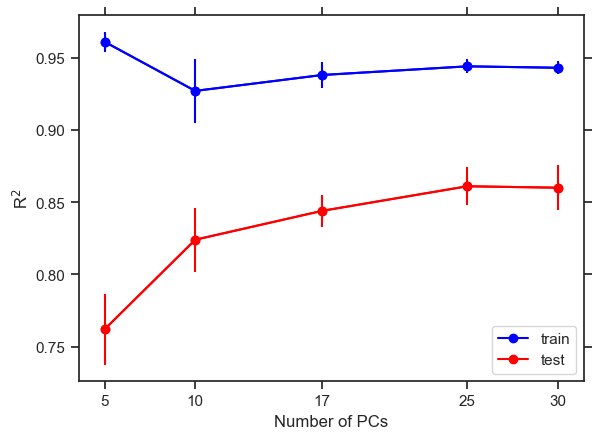

In [67]:
train_pc=-2
print(f"train% = {train_pcs[train_pc]:0.2f}")
plot_R2_learning_curve_num_PCs(num_PCs=num_PCs,avg_test_score=train_pcs_avg_test_score[train_pc],avg_train_score=train_pcs_avg_train_score[train_pc],std_test_score=train_pcs_std_test_score[train_pc],std_train_score=train_pcs_std_train_score[train_pc],filename=folder_path+"R2_learning_curve_test_split_80pc_30featPCA_training.png")

In [68]:
def plot_RMSE_learning_curve_num_PCs(num_PCs,avg_test_score,avg_train_score,std_test_score,std_train_score,filename="learning.png"):
    plt.tick_params(reset=True)
    plt.plot(num_PCs,avg_train_score[:,1],"-o",label="train",color="blue")
    plt.plot(num_PCs,avg_test_score[:,1],"-o",label="test",color="red")

    plt.scatter(num_PCs,avg_train_score[:,1],color="blue")
    plt.scatter(num_PCs,avg_test_score[:,1],color="red")

    plt.errorbar(num_PCs,avg_train_score[:,1],yerr=std_train_score[:,1],color="blue")
    plt.errorbar(num_PCs,avg_test_score[:,1],yerr=std_test_score[:,1],color="red")

    plt.xlabel("Number of PCs")
    plt.ylabel("RMSE")
    plt.legend()
    plt.xticks(num_PCs)
    plt.tight_layout()
    plt.savefig(filename,dpi=300)

train% = 0.80


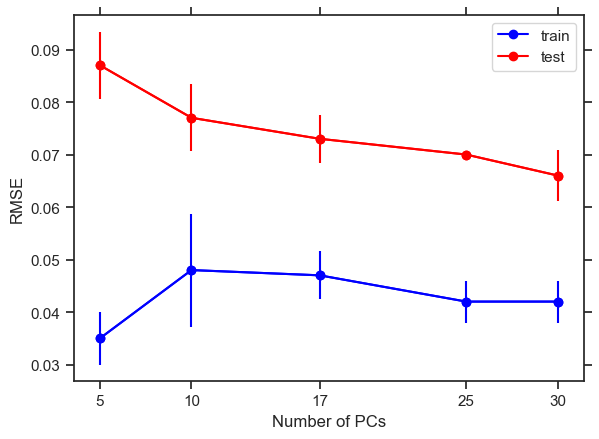

In [69]:
train_pc=-2
print(f"train% = {train_pcs[train_pc]:0.2f}")
plot_RMSE_learning_curve_num_PCs(num_PCs=num_PCs,avg_test_score=train_pcs_avg_test_score[train_pc],avg_train_score=train_pcs_avg_train_score[train_pc],std_test_score=train_pcs_std_test_score[train_pc],std_train_score=train_pcs_std_train_score[train_pc],filename=folder_path+"RMSE_learning_curve_test_split_80pc_30featPCA_training.png")

# Final performance

In [70]:
# Use 16 PCs and 80-20% train-test split 
X=df_rdkit_uncorr_30  # df_xdata has 16 PCs
y=ERed_data.Ered_ag

y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_pc=0.8,nPC=17,random_state=1)

returning scaled train and test data


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


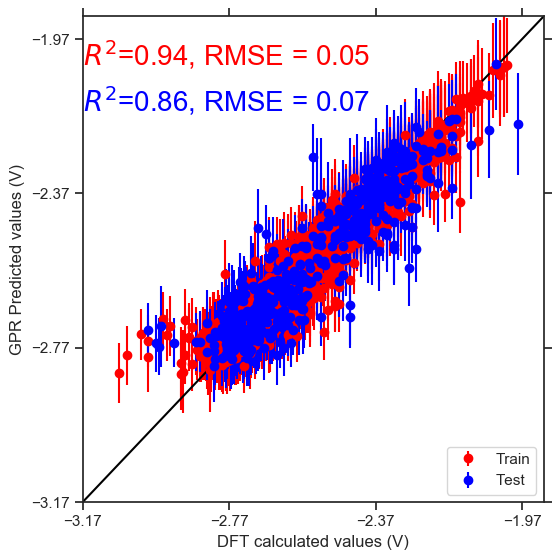

In [71]:
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=True,data=False,filename=folder_path+"base_model_17PCs_8020_2763mols.png")

with 25 PCs and 80-20% train-test split

returning scaled train and test data


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


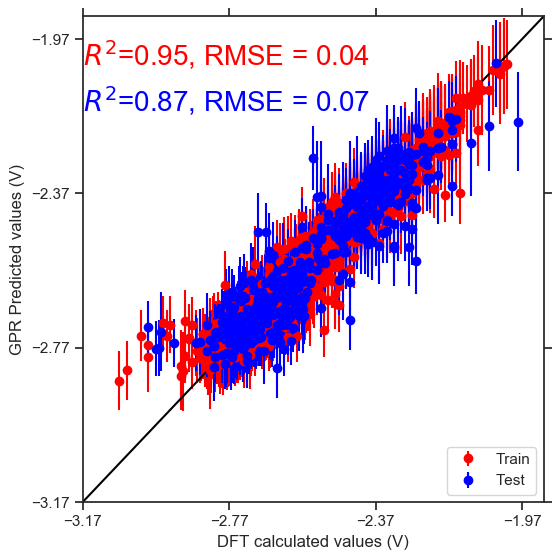

In [72]:
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_pc=0.8,nPC=25,random_state=1)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=True,data=False,filename=folder_path+"base_model_25PCs_8020_2763mols.png")

with 30 PCs and 80-20% train-test split

returning scaled train and test data


c:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


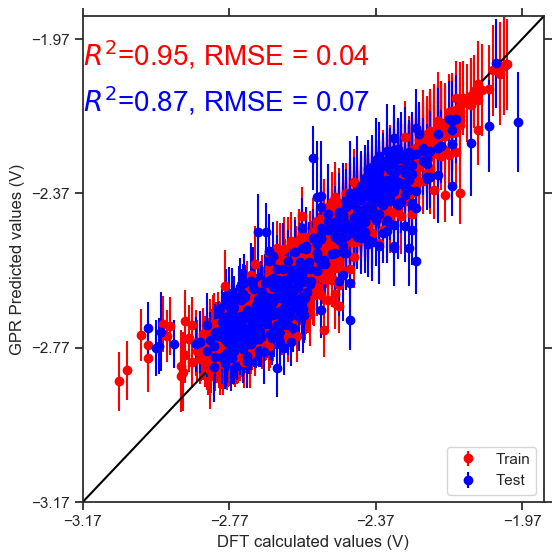

In [73]:
y_test,ypred_test,yerr_test,y_train, ypred_train, yerr_train=gpr_one_pca_pytorch(X=X,y=y,train_pc=0.8,nPC=30,random_state=1)
plot_Ered_gpr(y_true_train=y_train,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=True,data=False,filename=folder_path+"base_model_30PCs_8020_2763mols.png")